<img src="https://bl-i.thgim.com/public/news/national/s0jxrw/article38070476.ece/alternates/FREE_1200/cars24-logojpg" alt="Alternative Text" width="200" height="200">

# Cars24 Used Car Pricing Analysis

## Introduction

The used car market is a dynamic and complex industry, with numerous factors influencing pricing and buyer preferences. Analyzing pricing data can provide valuable insights and patterns that can enhance our understanding of the used car market. In this analysis, we will focus on the Cars24 used car listing pricing data and explore various aspects related to pricing trends, factors affecting prices, and potential patterns in buyer behavior.

The goal of this analysis is to uncover actionable insights that can benefit car dealers, buyers, and industry professionals. By examining the Cars24 dataset, we aim to identify key factors that influence the pricing of used cars, understand how different attributes impact prices, and gain insights into buyer preferences and market trends. 

We will utilize exploratory data analysis techniques and data visualization to delve into the dataset and extract meaningful information. The findings from this analysis can help car dealers optimize their pricing strategies, buyers make informed decisions, and industry professionals gain a deeper understanding of the dynamics of the used car market.

## Dataset

The primary source of data for this analysis is the Cars24 website. The dataset contains a comprehensive collection of used car listings, including various attributes such as make, model, year of manufacture, mileage, condition, and selling price. This dataset represents a diverse range of cars available in the market, offering a valuable resource for exploring pricing patterns and market trends.

## Analysis Approach

To accomplish our goal of uncovering valuable insights and patterns in the used car market, we will follow a structured approach:

1. Data Acquisition: Necessary data have been obtained from the Cars24 website.

2. Data Preprocessing: We will clean and prepare the dataset for analysis. This step involves handling missing values, dealing with duplicate values, removing irrelevant columns, and performing any necessary data transformations.

3. Exploratory Data Analysis: We will conduct exploratory data analysis to gain initial insights into the dataset. This includes visualizations, and identifying correlations between variables.

4. Pricing Trends Analysis: We will analyze pricing trends over time, identifying any seasonality or price fluctuations. This analysis will help us understand how the used car market evolves and how external factors might influence pricing.

5. Factors Affecting Pricing: We will investigate the factors that significantly impact the pricing of used cars. This may include attributes such as make, model, mileage, condition, and geographical location. Statistical modeling techniques will be employed to quantify the impact of these factors on pricing.

## Importing Required Libraries

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# # Set matplotlib to display plots inline in the Jupyter Notebook
# %matplotlib inline

## Loading the Dataset

In [2]:
# reading an excel file
df = pd.read_excel('cars24 ten cities.xlsx')

# Displaying a few sample records
df.head()

,car_manufacturer,car_model,car_model_series,transmission_type,year,kms_driven,age,owner,fuel_type,registration,price,summer_discount,locality,city,segment
0,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Manual,2017,52145,6,1,CNG,GJ-27,519000,NaN,Naroda,Ahmedabad,Budget
1,Maruti,Ertiga,VXI,Manual,2014,102942,9,2,Petrol,GJ-01,641000,6000.0,Naroda,Ahmedabad,Mid-size
2,Maruti,New Wagon-R,ZXI 1.2 old,Manual,2019,93341,4,1,CNG,GJ-08,510000,66000.0,Naroda,Ahmedabad,Budget
3,Hyundai,NEW I20,SPORTZ 1.2 MT,Manual,2021,38847,2,1,CNG,GJ-24,765000,35000.0,Naroda,Ahmedabad,Mid-size
4,Hyundai,Grand i10,MAGNA 1.2 KAPPA VTVT,Manual,2019,60019,4,1,CNG,GJ-01,562000,NaN,Naroda,Ahmedabad,Budget


## Exploring the Dataset

Gaining initial insights and understanding, examining the dataset's structure, including the number of rows and columns, data types, and summary statistics.

### Displaying the number of rows and columns

In [3]:
df.shape

(6187, 15)

### Checking for duplicate values

In [4]:
duplicates = df.duplicated().value_counts()
duplicates

False    6187
Name: count, dtype: int64

### Viewing the metadata info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_manufacturer   6187 non-null   object 
 1   car_model          6187 non-null   object 
 2   car_model_series   6187 non-null   object 
 3   transmission_type  6187 non-null   object 
 4   year               6187 non-null   int64  
 5   kms_driven         6187 non-null   int64  
 6   age                6187 non-null   int64  
 7   owner              6187 non-null   int64  
 8   fuel_type          6187 non-null   object 
 9   registration       6187 non-null   object 
 10  price              6187 non-null   int64  
 11  summer_discount    5198 non-null   float64
 12  locality           6187 non-null   object 
 13  city               6187 non-null   object 
 14  segment            6187 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 725.2+ KB


### Displaying the summary statistics of numeric columns

In [6]:
df.describe()

,year,kms_driven,age,owner,price,summer_discount
count,6187.000000,6187.000000,6187.000000,6187.000000,6.187000e+03,5198.000000
mean,2017.628738,46981.832067,5.371262,1.251657,6.626626e+05,51518.723548
std,2.751428,26223.433184,2.751428,0.456156,3.098844e+05,45562.094164
min,2010.000000,8.000000,0.000000,1.000000,1.250000e+05,4700.000000
25%,2016.000000,25957.500000,3.000000,1.000000,4.530000e+05,22000.000000
50%,2018.000000,44296.000000,5.000000,1.000000,6.030000e+05,39000.000000
75%,2020.000000,65759.500000,7.000000,1.000000,8.010000e+05,64000.000000
max,2023.000000,244253.000000,13.000000,4.000000,2.703000e+06,502000.000000


### Checking for null values

In [7]:
df.isnull().sum()

car_manufacturer       0
car_model              0
car_model_series       0
transmission_type      0
year                   0
kms_driven             0
age                    0
owner                  0
fuel_type              0
registration           0
price                  0
summer_discount      989
locality               0
city                   0
segment                0
dtype: int64

## EDA: Perform Exploratory Data Analysis 

### How does the price vary based on the car's registered year?

In [8]:
year_price = df.groupby('year')['price'].mean().round(2)[:-1]
year_price

year
2010    226114.29
2011    271305.56
2012    343793.64
2013    376584.80
2014    418344.28
2015    494594.44
2016    569469.20
2017    627977.32
2018    679176.84
2019    732228.06
2020    802089.77
2021    888990.12
2022    944333.81
Name: price, dtype: float64

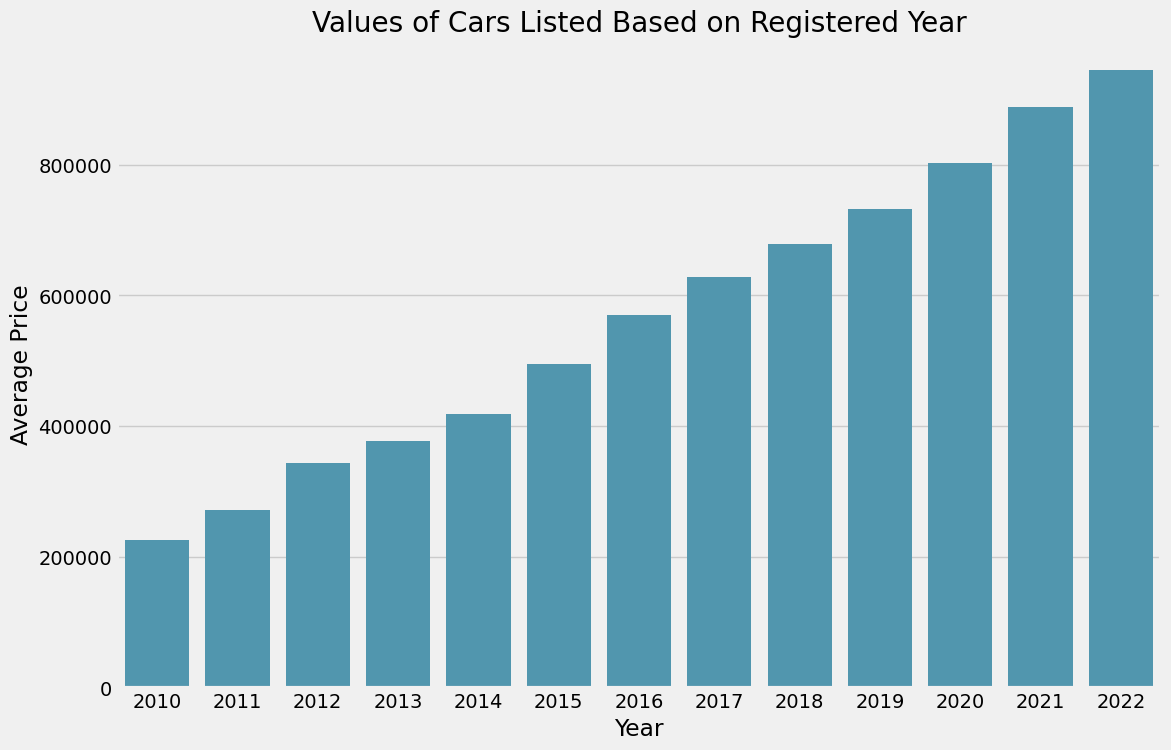

In [9]:
plt.figure(figsize=(12,8))

year_price = df.groupby('year')['price'].mean()[:-1]

sns.barplot(x=year_price.index, y=year_price.values, color='#429EBD')

plt.title('Values of Cars Listed Based on Registered Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

### 💡 Insight

- Steady Increase in Prices: There is a general trend of increasing average prices as the registering year becomes more recent. This indicates that newer cars tend to have higher average prices compared to older ones.

- Early-Year Prices: Cars registered between 2010 and 2012 have relatively lower average prices compared to subsequent years. The average price ranges from 226,114.29 (for 2010) to 343,793.64 (for 2012). This could be attributed to the depreciation of value that occurs as cars age.

- Mid-Year to Recent Prices: From 2013 onwards, there is a noticeable upward trend in average car prices. The average price continues to rise steadily with each passing year, indicating that newer car models demand higher prices in the used car market.

- Price Surge for Recent Years: The most significant increase in average prices is observed in cars registered from 2019 to 2022. These recent models have considerably higher average prices, reflecting their relatively newer and desirable features.

- Highest Average Prices: Among the analyzed registering years, 2022 records the highest average car price of 944,333.81, followed closely by 2021 at 888,990.12. This indicates that the most recently registered cars demand the highest prices on average.

### How is the pricing of used cars distributed among different manufacturers? 

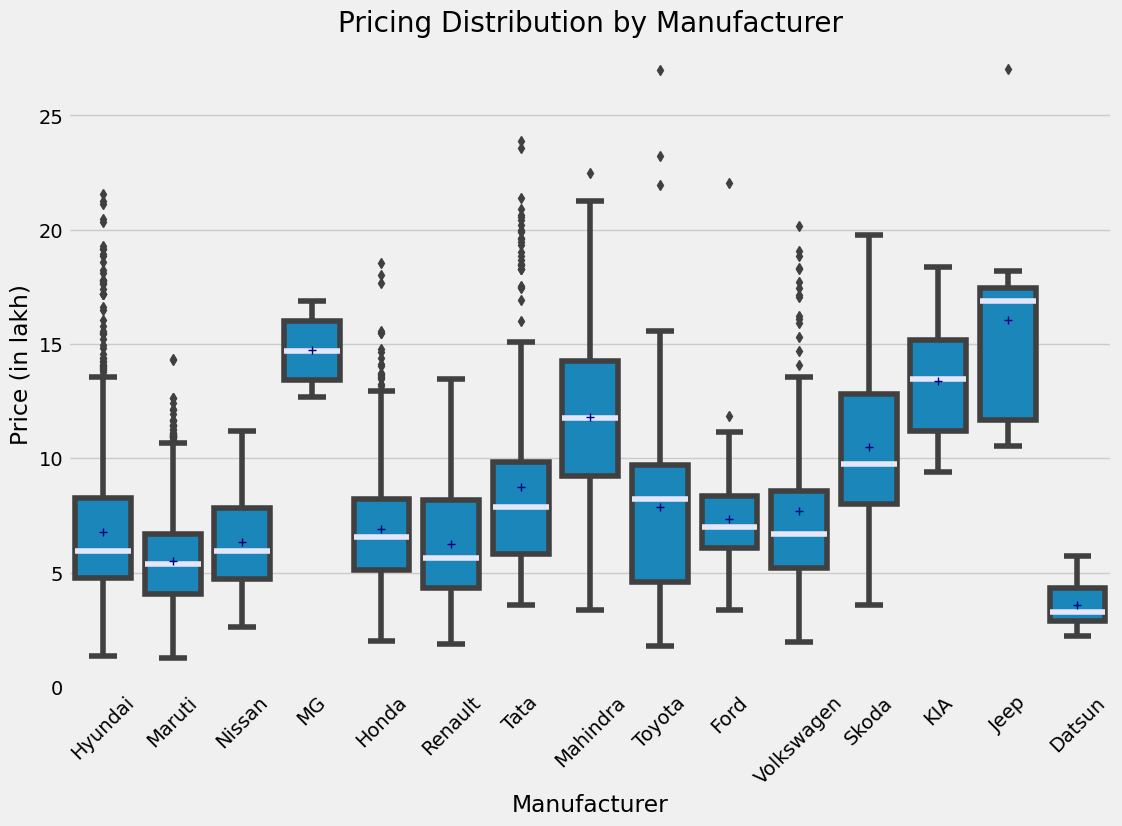

In [11]:
plt.figure(figsize=(12, 8))

# Filter out rows where the car manufacturer is BMW
filtered_df = df[df['car_manufacturer'] != 'BMW']

df['price_lakh'] = df['price'] / 1e5

sns.boxplot(data=filtered_df, x='car_manufacturer', y='price_lakh', color='#008FD5', showmeans=True,
            meanprops={'marker':'+', 'markeredgecolor':'navy'}, medianprops={'color': 'lavender'})

plt.title('Pricing Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price (in lakh)')
plt.xticks(rotation=45)
plt.show()

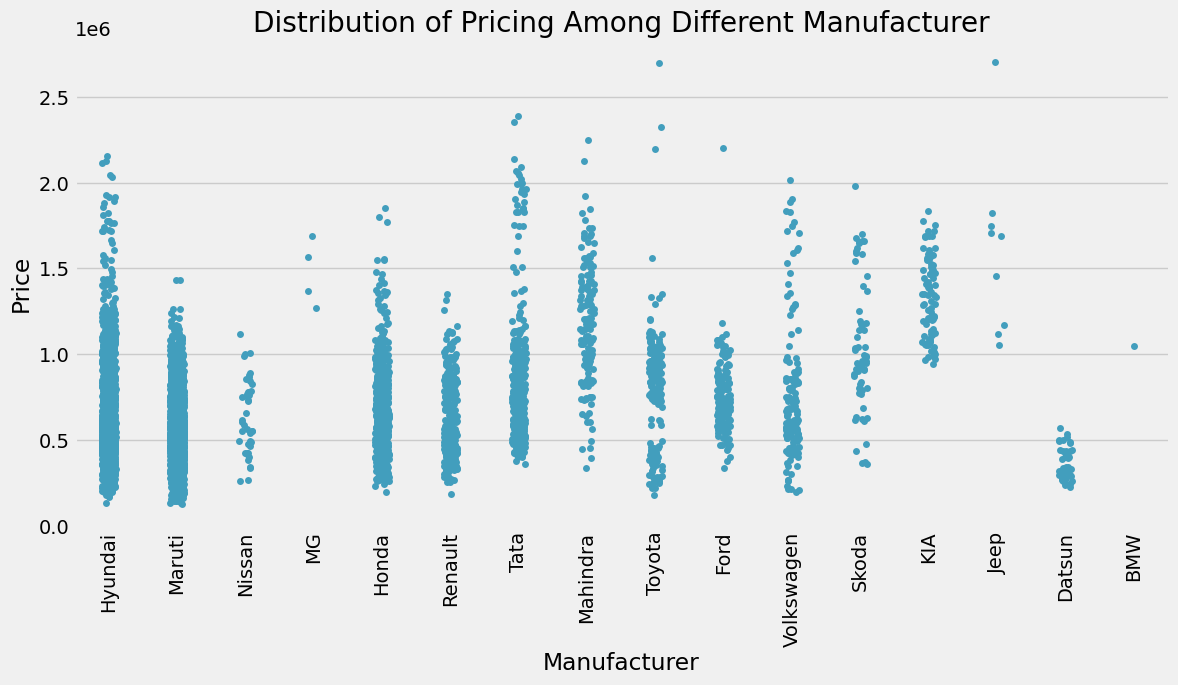

In [12]:
sns.catplot(data=df, x="car_manufacturer", y="price", color='#429EBD', height=6, aspect=2)

plt.title("Distribution of Pricing Among Different Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

### What is the distribution of cars across different price ranges?

In [13]:
price_range = df['price'].value_counts(bins=10).sort_values(ascending=False)
price_range

price
(382800.0, 640600.0]      2508
(640600.0, 898400.0]      1659
(122421.999, 382800.0]     937
(898400.0, 1156200.0]      692
(1156200.0, 1414000.0]     199
(1414000.0, 1671800.0]      94
(1671800.0, 1929600.0]      69
(1929600.0, 2187400.0]      21
(2187400.0, 2445200.0]       6
(2445200.0, 2703000.0]       2
Name: count, dtype: int64

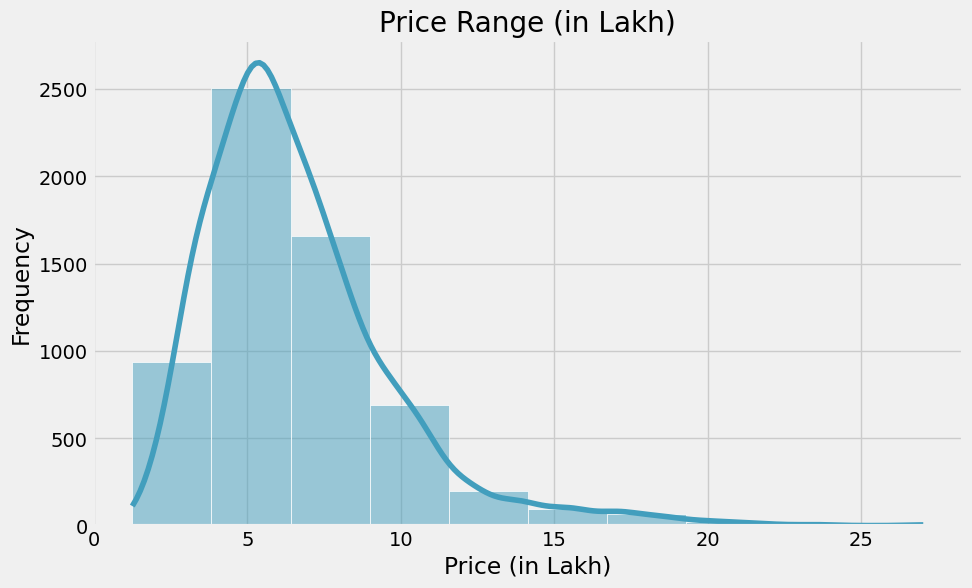

In [14]:
plt.figure(figsize=(10, 6))

prices_lakh = df['price'] / 100000

sns.histplot(prices_lakh, bins=10, color='#429EBD', edgecolor='white', kde=True)

plt.title('Price Range (in Lakh)')
plt.xlabel('Price (in Lakh)')
plt.ylabel('Frequency')
plt.show()

### 💡 Insight

One notable observation is that the majority of cars fall within the price range of INR 382,800 to INR 640,600, with a count of 2,508 listings. This price range had the highest number of cars available for sale on the website.

The second most common price range is between INR 640,600 and INR 898,400, with 1,659 listings. It is followed by the range of INR 122,421 to INR 382,800, which has 937 listings. It is noteworthy that this range had a substantial number of cars available as well.

As we move towards higher price ranges, the number of listings decreases. The price range of INR 898,400 to INR 1,156,200 has 692 listings, while the range of INR 1,156,200 to INR 1,414,000 has 199 listings.

Furthermore, the distribution of cars becomes less frequent in the higher price ranges. Ranges above INR 1,414,000, such as INR 1,414,000 to INR 1,671,800 and INR 1,671,800 to INR 1,929,600, exhibit a lower number of listings, with 94 and 69 respectively.

In the highest price ranges, above INR 1,929,600, the number of listings is significantly reduced. These ranges, from INR 1,929,600 to INR 2,187,400, and above, have limited representation, with only a few listings.

The distribution of cars across price ranges provides valuable insights into the availability and affordability of used cars in the market. These findings can assist potential car buyers in understanding the range of options within their desired price range and help them make informed decisions during their car search.

### What is the average price of different car manufacturers?

In [15]:
avg_manufacturer_price = (df['price'].mean() / 100000).round(2)
average_manufacturer_price = (df.groupby('car_manufacturer')['price'].mean().sort_values(ascending=False) / 100000).round(2)
max_average_price = (df.groupby('car_manufacturer')['price'].mean().max() / 100000).round(2)
min_average_price = (df.groupby('car_manufacturer')['price'].mean().min() / 100000).round(2)

print(average_manufacturer_price)
print()
print('----------------------------------------')
print('All the prices are in lakhs')
print('----------------------------------------')
print('Average price of cars:', avg_manufacturer_price)
print('Highest average price: ', max_average_price)
print('Lowest average price: ', min_average_price)

car_manufacturer
Jeep          16.06
MG            14.74
KIA           13.37
Mahindra      11.79
Skoda         10.51
BMW           10.45
Tata           8.74
Toyota         7.86
Volkswagen     7.70
Ford           7.32
Honda          6.89
Hyundai        6.78
Nissan         6.34
Renault        6.26
Maruti         5.51
Datsun         3.60
Name: price, dtype: float64

----------------------------------------
All the prices are in lakhs
----------------------------------------
Average price of cars: 6.63
Highest average price:  16.06
Lowest average price:  3.6


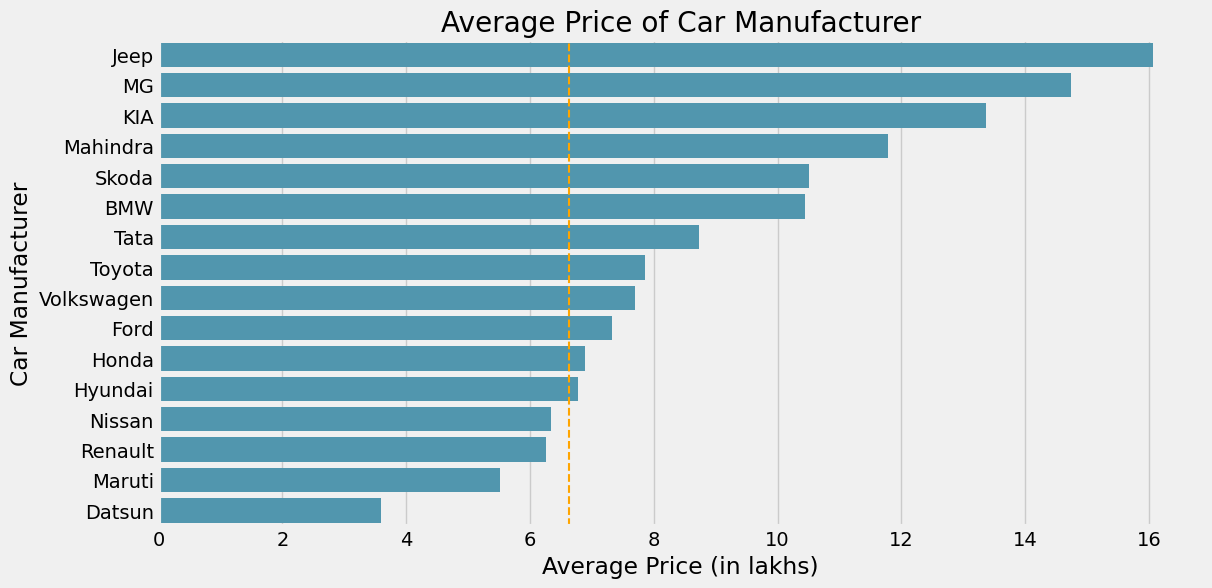

In [16]:
plt.figure(figsize=(12, 6))

df['price_lakhs'] = df['price'] / 100000
average_manufacturer_price = df.groupby('car_manufacturer')['price_lakhs'].mean().sort_values(ascending=False)
sns.barplot(x=average_manufacturer_price.values, y=average_manufacturer_price.index, color='#429EBD')

avg_price = df['price_lakhs'].mean()
plt.axvline(avg_price, color='orange', linestyle='--', label='Mean Price', linewidth=1.5)

plt.title('Average Price of Car Manufacturer')
plt.xlabel('Average Price (in lakhs)')
plt.ylabel('Car Manufacturer')
plt.show()

### 💡 Insight

These insights highlight the varying pricing strategies and market positioning of different car manufacturers within the used car segment.

The analysis reveals that Jeep has the highest average price among the listed car manufacturers, with an average price of 16.06 lakhs. This is followed closely by MG at 14.74 lakhs and KIA at 13.37 lakhs. Mahindra ranks fourth with an average price of 11.79 lakhs, while Skoda and BMW have similar average prices of 10.51 lakhs and 10.45 lakhs, respectively.

Moving down the price scale, Tata shows an average price of 8.74 lakhs, followed by Toyota at 7.86 lakhs and Volkswagen at 7.70 lakhs. Ford, Honda, Hyundai, Nissan, and Renault fall within the range of 7.32 lakhs to 6.26 lakhs. Maruti has a relatively lower average price of 5.51 lakhs, while Datsun has the lowest average price among the analyzed manufacturers at 3.60 lakhs.

### What is the median price of different car manufacturers?

In [17]:
med_manufacturer_price = df['price'].median()
median_manufacturer_price = (df.groupby('car_manufacturer')['price'].median().sort_values(ascending=False) / 100000).round(2)
print(median_manufacturer_price)
print()
print('----------------------------------------')
print('Median price of cars:', med_manufacturer_price)

car_manufacturer
Jeep          16.90
MG            14.70
KIA           13.47
Mahindra      11.76
BMW           10.45
Skoda          9.73
Toyota         8.23
Tata           7.84
Ford           7.00
Volkswagen     6.68
Honda          6.57
Nissan         5.95
Hyundai        5.94
Renault        5.65
Maruti         5.37
Datsun         3.28
Name: price, dtype: float64

----------------------------------------
Median price of cars: 603000.0


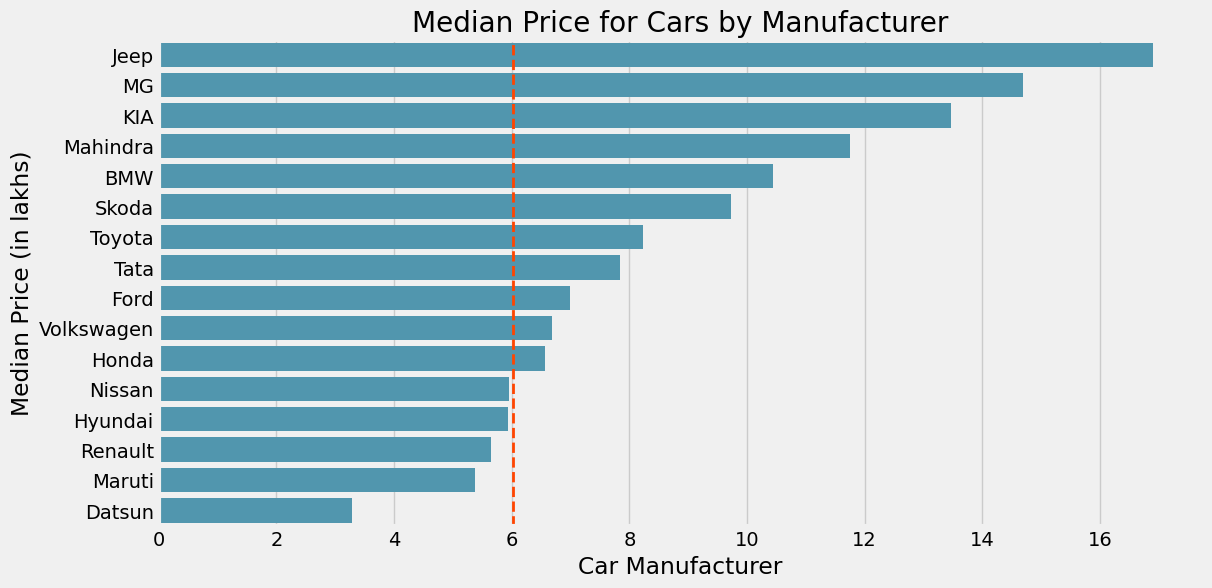

In [18]:
plt.figure(figsize=(12, 6))

df['price_lakhs'] = df['price'] / 100000
manufacturer_median_price = df.groupby('car_manufacturer')['price_lakhs'].median().reset_index()

# Sort the data by median price in descending order
manufacturer_median_price = manufacturer_median_price.sort_values(by='price_lakhs', ascending=False)

sns.barplot(data=manufacturer_median_price, y='car_manufacturer', x='price_lakhs', color='#429EBD')

avg_price = df['price_lakhs'].median()
plt.axvline(avg_price, color='orangered', linestyle='--', label='Median Price', linewidth=2.0)

plt.xlabel('Car Manufacturer')
plt.ylabel('Median Price (in lakhs)')
plt.title('Median Price for Cars by Manufacturer')
plt.show()

### 💡 Insight

Jeep has the highest median price at 16.90 lakhs, indicating that Jeep vehicles generally command a higher price in the used car market. Following closely is MG with a median price of 14.70 lakhs, positioning it as one of the more expensive brands in the dataset.

KIA and Mahindra occupy the third and fourth positions, respectively, with median prices of 13.47 lakhs and 11.76 lakhs. These figures suggest that KIA and Mahindra vehicles are priced relatively higher compared to other car manufacturers in the dataset.

Interestingly, BMW stands out with a median price of 10.45 lakhs, significantly lower than other luxury car brands. This observation can be attributed to the dataset containing only one listing for BMW, which might not be representative of the overall pricing pattern for BMW vehicles.

Skoda, Toyota, Tata, Ford, and Volkswagen all fall within the range of 6.68 to 9.73 lakhs, indicating a moderate pricing spectrum for these brands.

The remaining car manufacturers, including Honda, Nissan, Hyundai, Renault, Maruti, and Datsun, have median prices ranging from 3.28 to 6.57 lakhs. These brands are positioned in the lower to mid-range price segments, providing relatively more affordable options for used car buyers.

### Which car manufacturer has the highest range of prices?

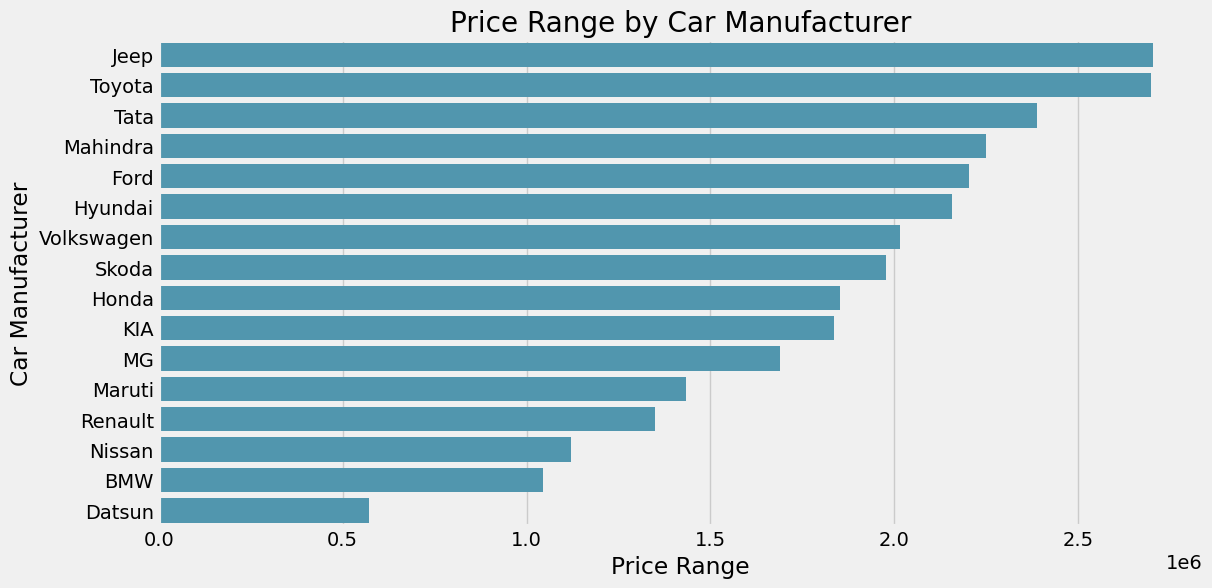

In [19]:
plt.figure(figsize=(12, 6))

# Calculate the minimum and maximum kilometers driven for each car manufacturer
price_range = df.groupby('car_manufacturer')['price'].agg(['min', 'max'])

# Reset the index to make 'car_manufacturer' a column again
price_range = price_range.reset_index()

# Sort the data by maximum kilometers driven in descending order
price_range = price_range.sort_values('max', ascending=False) 

sns.barplot(data=price_range, y='car_manufacturer', x='max', color='#429EBD')

plt.title('Price Range by Car Manufacturer')
plt.xlabel('Price Range')
plt.ylabel('Car Manufacturer')
plt.show()

### 💡 Insight

Jeep has the highest range, with prices ranging from 10.55 lakhs to 27.03 lakhs. Following Jeep, Toyota exhibits a significant range from 1.8 lakhs to 26.98 lakhs. Tata and Mahindra also demonstrate a considerable range of prices, with Tata ranging from 3.57 lakhs to 23.87 lakhs and Mahindra ranging from 3.36 lakhs to 22.5 lakhs.

Other notable car manufacturers with varying price ranges include Ford (3.37 lakhs to 22.04 lakhs), Hyundai (1.34 lakhs to 21.57 lakhs), and Volkswagen (1.94 lakhs to 20.16 lakhs). Skoda and Honda showcase relatively narrower price ranges, ranging from 3.59 lakhs to 19.78 lakhs and 1.99 lakhs to 18.53 lakhs, respectively.

It is interesting to observe that KIA, MG, Maruti, Renault, and Nissan also exhibit varying price ranges, with different lower and upper limits. However, it is important to note that BMW stands out as the only car manufacturer with just one listing in the dataset, providing a unique pricing perspective.

### What is the distribution of cars value for each manufacturer in terms of market share?

In [20]:
print('------------------------------------------------------------------------------------------------')
print('Sum of the total value of cars listed of each manufacturer ("prices are in INR Lakhs")')
print('------------------------------------------------------------------------------------------------')

manufacturer_market_share = df.groupby('car_manufacturer')['price'].sum().sort_values(ascending=False)
manufacturer_market_share

------------------------------------------------------------------------------------------------
Sum of the total value of cars listed of each manufacturer ("prices are in INR Lakhs")
------------------------------------------------------------------------------------------------


car_manufacturer
Maruti        1432950750
Hyundai       1005496250
Honda          408309250
Tata           277844575
Renault        195999000
Mahindra       160316950
Toyota         138385900
Ford           124524000
KIA            116294000
Volkswagen     110845000
Skoda           63080800
Nissan          27891400
Datsun          16556800
Jeep            14457000
MG               5897000
BMW              1045000
Name: price, dtype: int64

In [21]:
print('--------------------------------------------------------------------------------------------------------')
print('Percentage of sum of total value of cars listed of each manufacturer ("prices are in INR Lakhs")')
print('--------------------------------------------------------------------------------------------------------')

total_sum = (manufacturer_market_share.sum())
market_share_percentage = (manufacturer_market_share / total_sum) * 100
market_share_percentage

--------------------------------------------------------------------------------------------------------
Percentage of sum of total value of cars listed of each manufacturer ("prices are in INR Lakhs")
--------------------------------------------------------------------------------------------------------


car_manufacturer
Maruti        34.950925
Hyundai       24.524935
Honda          9.959020
Tata           6.776873
Renault        4.780587
Mahindra       3.910271
Toyota         3.375353
Ford           3.037249
KIA            2.836513
Volkswagen     2.703607
Skoda          1.538596
Nissan         0.680296
Datsun         0.403835
Jeep           0.352619
MG             0.143833
BMW            0.025488
Name: price, dtype: float64

<Figure size 1200x1200 with 0 Axes>

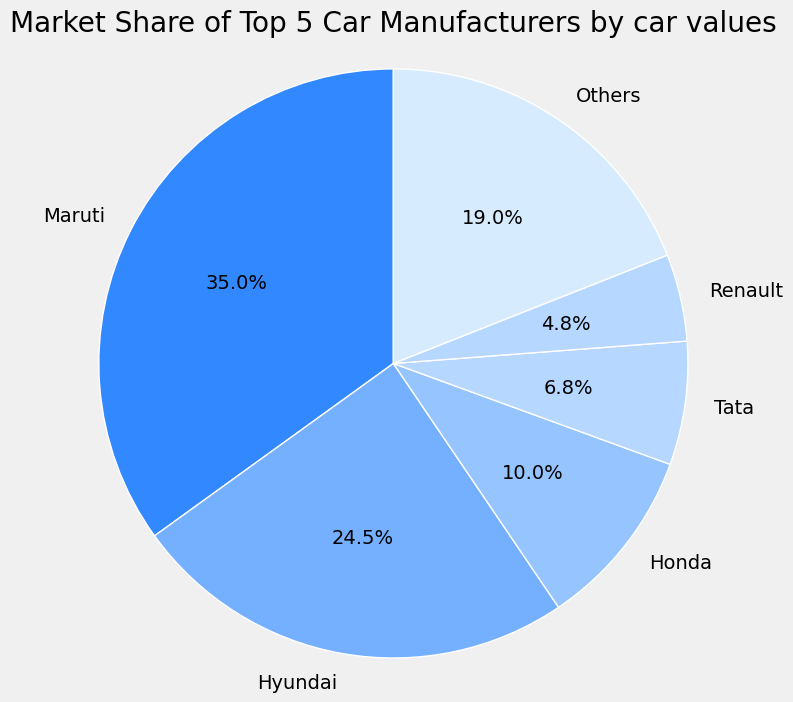

In [22]:
plt.figure(figsize=(12, 12))

manufacturer_market_share = df.groupby('car_manufacturer')['price'].sum()

# Sort the manufacturers by their total values in descending order
sorted_manufacturers = manufacturer_market_share.sort_values(ascending=False)

# Select the top 5 manufacturers and combine the rest as "Others"
top_5_manufacturers = sorted_manufacturers.head(5)
other_manufacturers_values = sorted_manufacturers[5:].sum()

# Create a list of labels including the top 5 manufacturers and "Others"
labels = list(top_5_manufacturers.index) + ['Others']

# Create a list of values including the market share of the top 5 manufacturers and the combined value of others
values = list(top_5_manufacturers.values) + [other_manufacturers_values]

colors = ['#3288FF', '#74B0FF', '#95C4FF', '#B6D7FF', '#B6D7FF', '#D7EBFF']
# colors = ['#3288FF', '#74B0FF', '#95C4FF', '#B6D7FF', '#B6D7FF', '#D7EBFF']

# Set the border properties for the pie chart sectors
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'black'}

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)
plt.title('Market Share of Top 5 Car Manufacturers by car values')
plt.axis('equal')
plt.show()

### 💡 Insight

Maruti holds the largest portion of the market, accounting for approximately 34.95% of the listings. Following closely is Hyundai claimed a significant market share with approximately 24.52%. Honda holds a significant but relatively smaller share at 9.96%.

Tata, Renault, and Mahindra hold market shares of 6.78%, 4.78%, and 3.91% respectively. Toyota and Ford hold slightly lower shares of 3.38% and 3.04%, respectively. All these manufacturers have a notable presence in the used car market. 

Other manufacturers such as KIA, Volkswagen, Skoda, Nissan, Datsun, Jeep, MG, and BMW have smaller market shares, each representing less than 3% of the overall market. Particularly, BMW has a minimal presence in the used car market, accounting for only 0.03% of the total market share.

It is important to note that the market share distribution may vary based on factors such as brand reputation, pricing, model availability, and customer preferences. Understanding the market share distribution among car manufacturers provides valuable insights for strategic decision-making and identifying potential areas of growth and competition within the used car industry.

These insights suggest that Maruti and Hyundai are the leading players in the used car market, wjile other manufacturers have relatively smaller shares.

### What are the top 10 car models that have the highest price range?

In [23]:
model_price_range = df.groupby('car_model')['price'].agg(['min', 'max']).reset_index()
model_price_range['range'] = model_price_range['max'] - model_price_range['min']
sorted_model_price_range = model_price_range.sort_values('range', ascending=False).head(10)
sorted_model_price_range

,car_model,min,max,range
108,Verna,275000,1718000,1443000
55,Innova Crysta,1332300,2698000,1365700
24,City,240000,1547000,1307000
116,XUV500,638000,1920000,1282000
29,Creta,627000,1895000,1268000
107,Vento,264000,1406000,1142000
101,Thar,650000,1783000,1133000
28,Corolla Altis,244000,1348000,1104000
75,Octavia,908000,1978000,1070000
71,New Elantra,561000,1605000,1044000


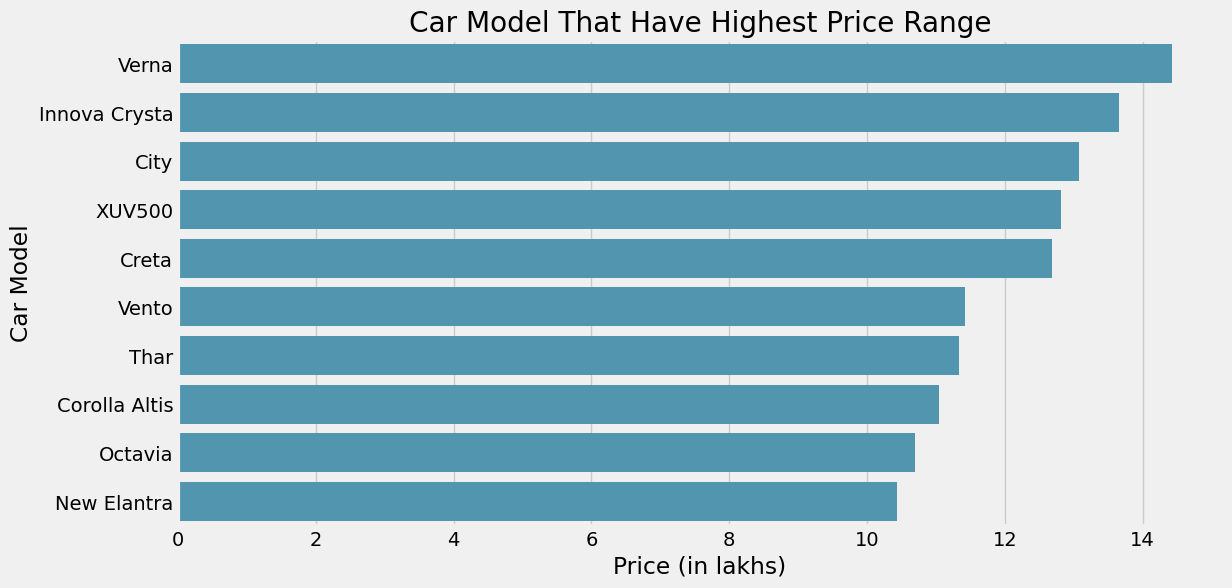

In [24]:
plt.figure(figsize=(12, 6))

price_range_df = sorted_model_price_range['range']/100000

sns.barplot(data=sorted_model_price_range, x=price_range_df, y='car_model', color='#429EBD')

plt.xlabel('Price (in lakhs)')
plt.ylabel('Car Model')
plt.title('Car Model That Have Highest Price Range')
plt.show()

### 💡 Insight

- Verna: The Verna model exhibits the highest price range among all the car models analyzed, with a range of 1,443,000 lakhs. The minimum price for a Verna is 275,000 lakhs, while the maximum price reaches 1,718,000 lakhs.

- Innova Crysta: Following closely, the Innova Crysta showcases a significant price range of 1,365,700 lakhs. The minimum price for an Innova Crysta is 1,332,300 lakhs, while the maximum price stands at 2,698,000 lakhs.

- City: The City model demonstrates a substantial price range of 1,307,000 lakhs. Prices for the City range from 240,000 lakhs as the minimum to 1,547,000 lakhs as the maximum.

- XUV500: With a price range of 1,282,000 lakhs, the XUV500 offers a diverse range of prices. The minimum price for an XUV500 is 638,000 lakhs, while the maximum price reaches 1,920,000 lakhs.

- Creta: The Creta model presents a price range of 1,268,000 lakhs. Prices for the Creta range from a minimum of 627,000 lakhs to a maximum of 1,895,000 lakhs.

- Vento: The Vento exhibits a price range of 1,142,000 lakhs. Prices for the Vento range from a minimum of 264,000 lakhs to a maximum of 1,406,000 lakhs.

- Thar: The Thar model demonstrates a price range of 1,133,000 lakhs. The minimum price for a Thar is 650,000 lakhs, while the maximum price stands at 1,783,000 lakhs.

- Corolla Altis: With a price range of 1,104,000 lakhs, the Corolla Altis offers a considerable range of prices. The minimum price for a Corolla Altis is 244,000 lakhs, while the maximum price reaches 1,348,000 lakhs.

- Octavia: The Octavia model presents a price range of 1,070,000 lakhs. Prices for the Octavia range from a minimum of 908,000 lakhs to a maximum of 1,978,000 lakhs.

- New Elantra: Lastly, the New Elantra exhibits a price range of 1,044,000 lakhs. The minimum price for a New Elantra is 561,000 lakhs, while the maximum price stands at 1,605,000 lakhs.

### How is the pricing distributed across different cities?

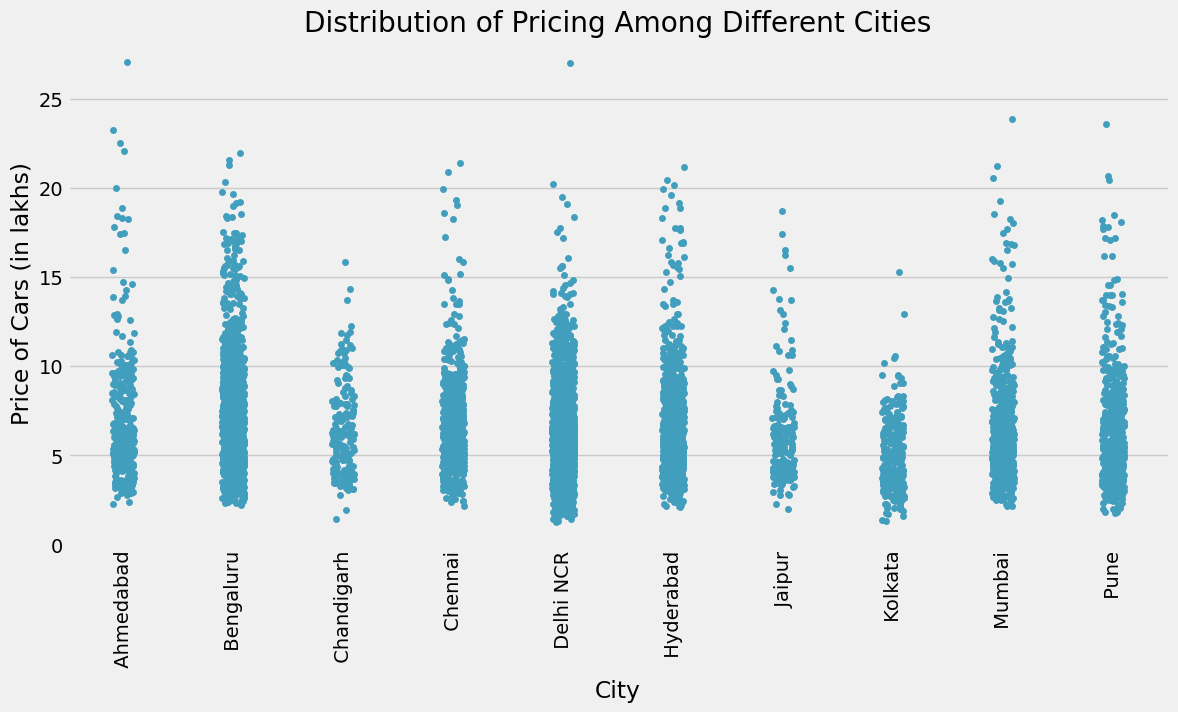

In [25]:
price = df['price']/100000
sns.catplot(data=df, x="city", y=price, color='#429EBD', height=6, aspect=2)

plt.title("Distribution of Pricing Among Different Cities")
plt.xlabel("City")
plt.ylabel("Price of Cars (in lakhs)")
plt.xticks(rotation=90)
plt.show()

### How does the price of used cars differ among different models?

#### Top 10 car models that have the highest median price

In [26]:
model_highest_avg_price = df.groupby('car_model')['price'].median() / 100000
model_highest_avg_price = model_highest_avg_price.sort_values(ascending=False).head(10)
model_highest_avg_price

car_model
GRAND CHEROKEE    27.030
SCORPIO-N         22.500
Endeavour         22.040
Innova Crysta     21.960
ALCAZAR           20.330
Safari            19.940
TIGUAN            18.590
Harrier           18.275
XUV700            17.910
Civic             17.690
Name: price, dtype: float64

#### Top 10 car models that have the lowest median price

In [27]:
model_lowest_avg_price = df.groupby('car_model')['price'].median() / 100000
model_lowest_avg_price = model_lowest_avg_price.sort_values(ascending=False).tail(10)
model_lowest_avg_price

car_model
i10            3.1600
Eon            3.0900
Alto 800       2.9725
Etios          2.9350
OMNI E         2.8800
Go             2.7800
Santro Xing    2.4700
A Star         2.2000
Wagon R        1.9600
Zen Estilo     1.6700
Name: price, dtype: float64

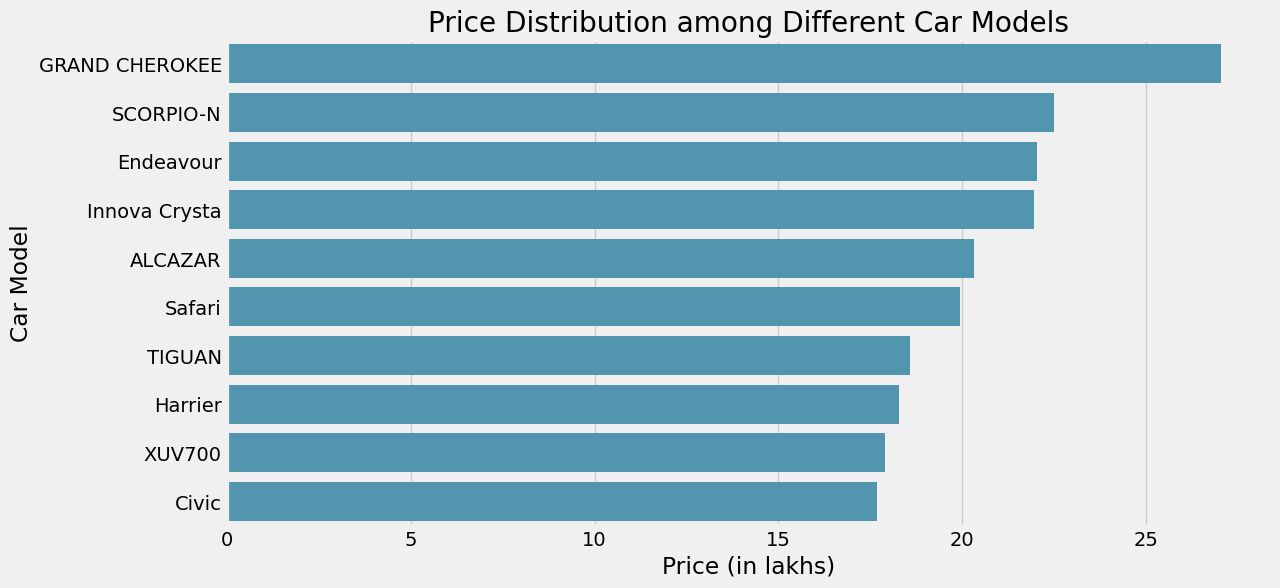

In [28]:
plt.figure(figsize=(12, 6))

model_highest_avg_price = df.groupby('car_model')['price'].median() / 100000
model_highest_avg_price = model_highest_avg_price.sort_values(ascending=False).head(10)

sns.barplot(y=model_highest_avg_price.index, x=model_highest_avg_price.values, color='#429EBD')

plt.title('Price Distribution among Different Car Models')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Car Model')
plt.show()

### 💡 Insight

#### Top 10 car models with the highest median price:

1. GRAND CHEROKEE - The car model GRAND CHEROKEE stands out with a median price of 27.030 lakhs.
2. SCORPIO-N - SCORPIO-N follows closely with a median price of 22.500 lakhs.
3. Endeavour - The car model Endeavour is priced at a median value of 22.040 lakhs.
4. Innova Crysta - Innova Crysta is another popular model with a median price of 21.960 lakhs.
5. ALCAZAR - ALCAZAR holds a median price of 20.330 lakhs.
6. Safari - The car model Safari is priced at a median value of 19.940 lakhs.
7. TIGUAN - TIGUAN stands at a median price of 18.590 lakhs.
8. Harrier - Harrier is another model with a median price of 18.275 lakhs.
9. XUV700 - XUV700 holds a median price of 17.910 lakhs.
10. Civic - The car model Civic concludes the list of the top 10 car models with a median price of 17.690 lakhs.

#### Top 10 car models with the lowest median price:

1. i10 - The car model i10 is the most affordable with a median price of 3.1600 lakhs.
2. Eon - Eon follows closely with a median price of 3.0900 lakhs.
3. Alto 800 - Alto 800 is priced at a median value of 2.9725 lakhs.
4. Etios - The car model Etios is priced at a median value of 2.9350 lakhs.
5. OMNI E - OMNI E holds a median price of 2.8800 lakhs.
6. Go - The car model Go is priced at a median value of 2.7800 lakhs.
7. Santro Xing - Santro Xing stands at a median price of 2.4700 lakhs.
8. A Star - A Star is another model with a median price of 2.2000 lakhs.
9. Wagon R - Wagon R holds a median price of 1.9600 lakhs.
10. Zen Estilo - The car model Zen Estilo concludes the list of the top 10 car models with a median price of 1.6700 lakhs.

These insights provide a clear picture of the price range across various car models. It is evident that high-end models like GRAND CHEROKEE and SCORPIO-N command significantly higher prices, while economical models such as Zen Estilo and Wagon R are available at much lower prices. However, it is important to note that these prices are specific to the dataset analyzed, and real-world prices may vary.

### How does the median price of used cars vary across different cities?

In [29]:
city_median_price = df.groupby('city')['price'].median()
city_median_price = city_median_price.sort_values(ascending=False)
city_median_price

city
 Bengaluru     696000.0
 Hyderabad     657000.0
 Chennai       633500.0
 Chandigarh    615500.0
 Jaipur        584000.0
 Delhi NCR     581000.0
 Ahmedabad     579500.0
 Mumbai        577000.0
 Pune          535000.0
 Kolkata       462500.0
Name: price, dtype: float64

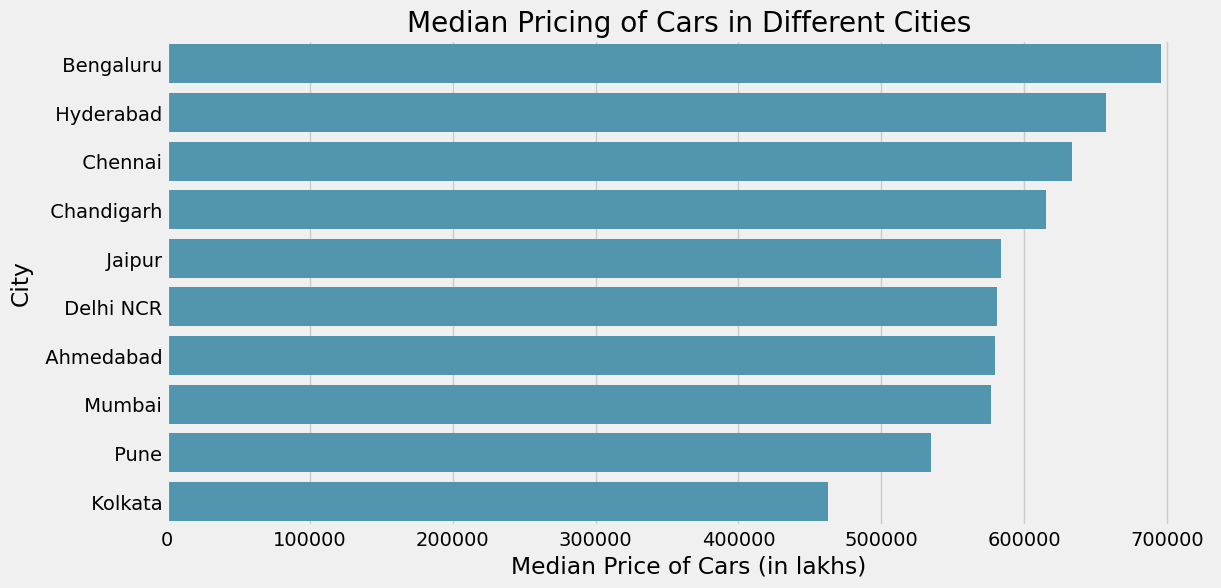

In [30]:
plt.figure(figsize=(12, 6))

city_median_price = df.groupby('city')['price'].median().sort_values(ascending=False)
sns.barplot(x=city_median_price.values, y=city_median_price.index, color='#429EBD')

plt.title("Median Pricing of Cars in Different Cities")
plt.xlabel("Median Price of Cars (in lakhs)")
plt.ylabel("City")
plt.show()

### 💡 Insight

- Bengaluru: With a median price of 696,000.0, Bengaluru exhibits the highest median price among the analyzed cities. This suggests that used cars in Bengaluru generally command higher prices compared to other cities.

- Hyderabad: Following closely behind Bengaluru, Hyderabad showcases a median price of 657,000.0. This indicates that the used car market in Hyderabad is also relatively high-priced, making it the second most expensive city among the analyzed dataset.

- Chennai: Chennai ranks third with a median price of 633,500.0. Although slightly lower than Bengaluru and Hyderabad, Chennai's used car market still reflects a considerable price range.

- Chandigarh: Occupying the fourth position, Chandigarh exhibits a median price of 615,500.0. The used car market in Chandigarh is notably competitive, with prices that are slightly lower than those in the top three cities.

- Jaipur: Jaipur secures the fifth spot with a median price of 584,000.0. This suggests that the used car market in Jaipur is relatively more affordable compared to the top four cities.

- Delhi NCR: With a median price of 581,000.0, Delhi NCR stands as the sixth city in the analysis. The used car market in the Delhi National Capital Region showcases similar price trends to Jaipur.

- Ahmedabad: Following Delhi NCR, Ahmedabad demonstrates a median price of 579,500.0. The used car market in Ahmedabad is characterized by prices that are comparable to those in Delhi NCR.

- Mumbai: The median price in Mumbai is 577,000.0, making it the eighth city in the analysis. Mumbai's used car market exhibits pricing patterns similar to Ahmedabad and Delhi NCR.

- Pune: Securing the ninth position, Pune showcases a median price of 535,000.0. The used car market in Pune is relatively more affordable compared to the top eight cities.

- Kolkata: Among the analyzed cities, Kolkata represents the most affordable used car market, with a median price of 462,500.0. This indicates that used cars in Kolkata generally have lower price tags compared to other cities.

### How does the average price of used cars vary across different cities?

In [31]:
city_mean_price = df.groupby('city')['price'].mean().round(2)
city_mean_price = city_mean_price.sort_values(ascending=False)
city_mean_price

city
 Bengaluru     751669.27
 Hyderabad     701199.63
 Ahmedabad     682852.65
 Chennai       675707.18
 Chandigarh    660139.97
 Mumbai        654482.17
 Jaipur        635771.07
 Delhi NCR     620698.03
 Pune          620358.57
 Kolkata       498012.99
Name: price, dtype: float64

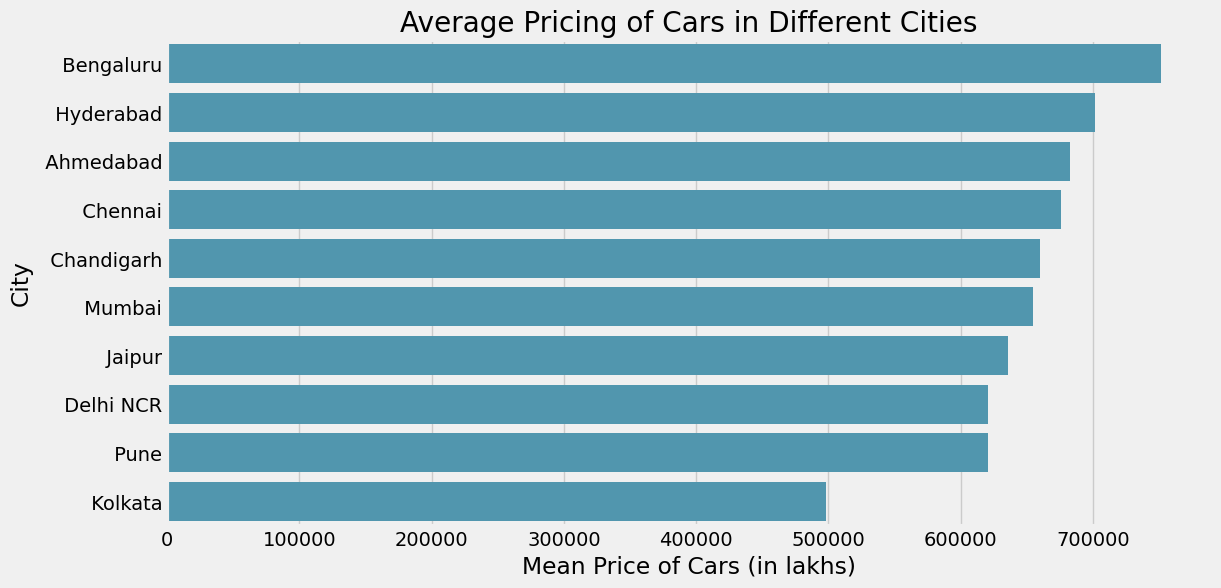

In [32]:
plt.figure(figsize=(12, 6))

sns.barplot(x=city_mean_price.values, y=city_mean_price.index, color='#429EBD')

plt.title("Average Pricing of Cars in Different Cities")
plt.xlabel("Mean Price of Cars (in lakhs)")
plt.ylabel("City")
plt.show()

### 💡 Insight

- Bengaluru: The average price of used cars in Bengaluru is ₹751,669.27, making it the city with the highest average price among the analyzed cities.

- Hyderabad: Hyderabad follows closely behind Bengaluru, with an average price of ₹701,199.63 for used cars.

- Ahmedabad: The average price of used cars in Ahmedabad is ₹682,852.65, placing it in the third position among the analyzed cities.

- Chennai: Chennai has an average used car price of ₹675,707.18, making it the fourth-highest priced city in terms of used cars.

- Chandigarh: The average price of used cars in Chandigarh is ₹660,139.97, placing it fifth in terms of average prices among the analyzed cities.

- Mumbai: Mumbai has an average used car price of ₹654,482.17, securing it the sixth position in the list of cities with the highest average prices.

- Jaipur: Jaipur follows with an average price of ₹635,771.07 for used cars.

- Delhi NCR: The average price of used cars in the Delhi National Capital Region (NCR) is ₹620,698.03.

- Pune: Pune has a similar average price to Delhi NCR, with used cars averaging at ₹620,358.57.

- Kolkata: Among the analyzed cities, Kolkata has the lowest average price for used cars, with ₹498,012.99.

### What is the median price of cars of different segments?

In [33]:
segment_median_price = df.groupby('segment')['price'].median().sort_values(ascending=False)
segment_median_price

segment
Premium     1716500.0
Mid-size     786000.0
Budget       451000.0
Name: price, dtype: float64

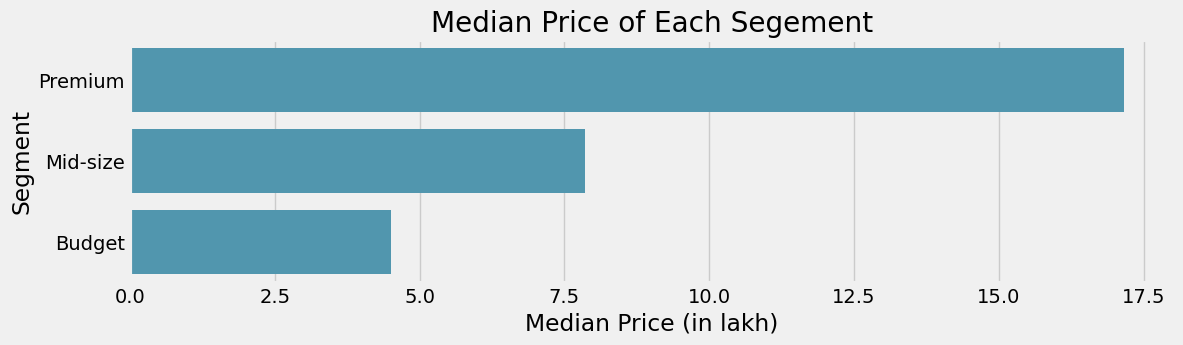

In [34]:
plt.figure(figsize=(12,3))

segment_median_price_values = (segment_median_price.values) / 100000
sns.barplot(data=df, y=segment_median_price.index, x=segment_median_price_values, color='#429EBD', width=0.8)

plt.title('Median Price of Each Segement')
plt.xlabel('Median Price (in lakh)')
plt.ylabel('Segment')
plt.show()

### 💡 Insight

**Premium Segment**: The premium segment exhibited the highest median price among all the segments, with a value of INR 1,716,500 lakhs.

**Mid-size Segment**: The mid-size segment, on the other hand, displayed a median price of INR 786,000 lakhs.

**Budget Segment**: Lastly, the budget segment exhibited the lowest median price of INR 451,000 lakhs.

### What is the median price of cars in each city of different segments?

In [35]:
segment_city_median_price = df.groupby(['city', 'segment'])['price'].median().unstack()
segment_city_median_price

segment,Budget,Mid-size,Premium
city,,,
Ahmedabad,495000.0,810000.0,1836000.0
Bengaluru,459500.0,826500.0,1679500.0
Chandigarh,438000.0,779000.0,1582000.0
Chennai,474000.0,769000.0,1843500.0
Delhi NCR,461000.0,769500.0,1752000.0
Hyderabad,436000.0,798000.0,1703000.0
Jaipur,434500.0,714000.0,1651000.0
Kolkata,378000.0,714000.0,1529000.0
Mumbai,451000.0,801000.0,1717500.0


<Figure size 1200x1000 with 0 Axes>

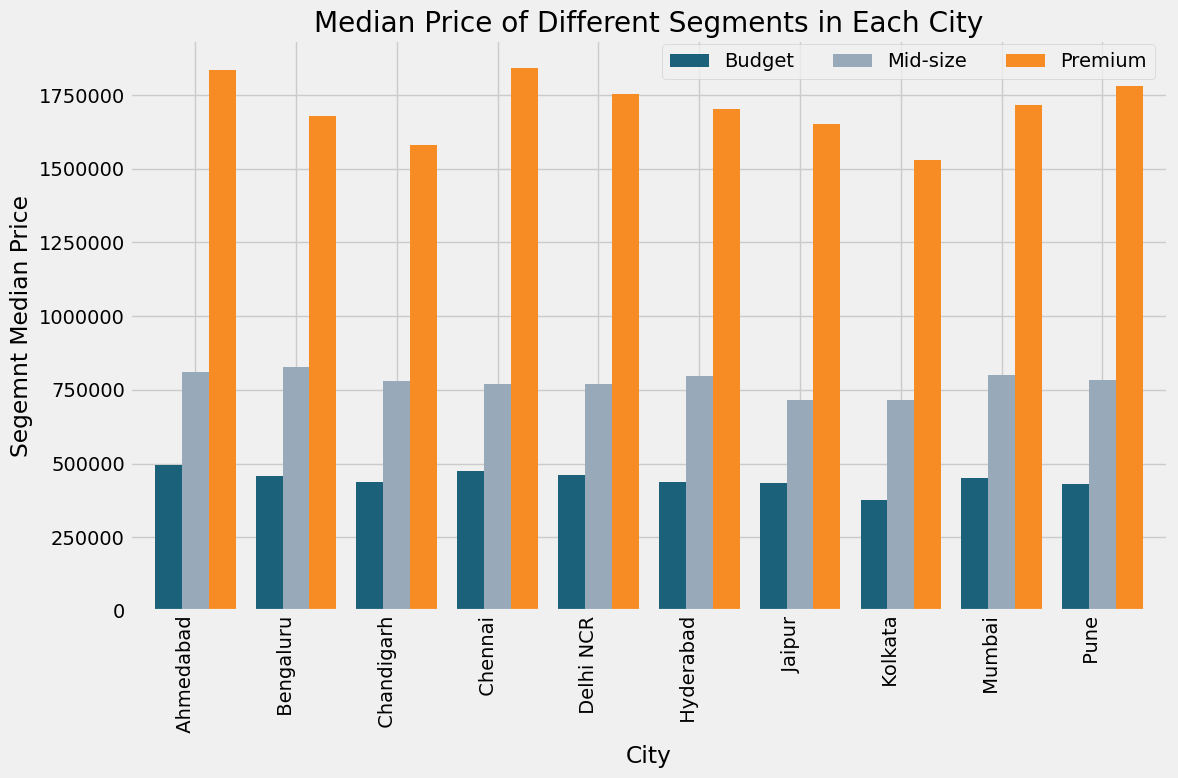

In [36]:
plt.figure(figsize=(12, 10))

colors= ['#1a6179', '#98aab9', '#f88c24']

segment_city_median_price.plot(kind='bar', width=0.8, color=colors, figsize=(12, 8))

plt.xlabel('City')
plt.ylabel('Segemnt Median Price')
plt.title('Median Price of Different Segments in Each City')
plt.xticks(rotation=90, ha='right')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.01), ncol=3)

# Format y-axis labels in plain form
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

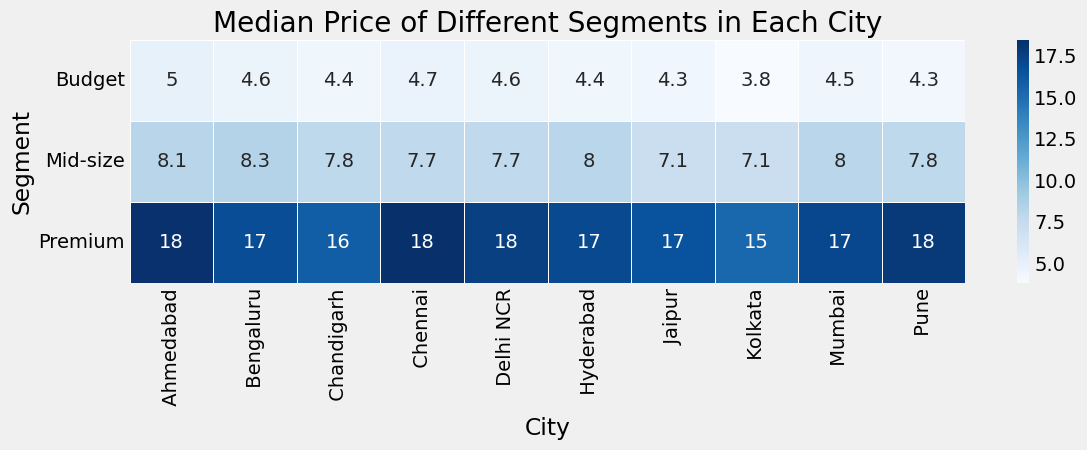

In [37]:
plt.figure(figsize=(12,3))

segment_city_median_price = segment_city_median_price / 100000

segment_city_median_price = segment_city_median_price.T

sns.heatmap(segment_city_median_price, cmap='Blues', annot=True, linewidths=0.5)

plt.title('Median Price of Different Segments in Each City')
plt.xlabel('City')
plt.ylabel('Segment')
plt.xticks(rotation=90)
plt.show()

### 💡 Insight

**Ahmedabad**:
- Budget Segment: The median price of used cars in the budget segment is ₹495,000 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹810,000 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,836,000 lakhs.

**Bengaluru**:
- Budget Segment: The median price of used cars in the budget segment is ₹459,500 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹826,500 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,679,500 lakhs.

**Chandigarh**:
- Budget Segment: The median price of used cars in the budget segment is ₹438,000 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹779,000 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,582,000 lakhs.

**Chennai**:
- Budget Segment: The median price of used cars in the budget segment is ₹474,000 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹769,000 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,843,500 lakhs.

**Delhi NCR**:
- Budget Segment: The median price of used cars in the budget segment is ₹461,000 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹769,500 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,752,000 lakhs.

**Hyderabad**:
- Budget Segment: The median price of used cars in the budget segment is ₹436,000 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹798,000 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,703,000 lakhs.

**Jaipur**:
- Budget Segment: The median price of used cars in the budget segment is ₹434,500 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹714,000 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,651,000 lakhs.

**Kolkata**:
- Budget Segment: The median price of used cars in the budget segment is ₹378,000.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹714,000 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,529,000 lakhs.

**Mumbai**:
- Budget Segment: The median price of used cars in the budget segment is ₹451,000 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹801,000 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,717,500 lakhs.

**Pune**:
- Budget Segment: The median price of used cars in the budget segment is ₹429,000 lakhs.
- Mid-size Segment: The median price of used cars in the mid-size segment is ₹782,500 lakhs.
- Premium Segment: The median price of used cars in the premium segment is ₹1,781,000 lakhs.

### Budget and Mid segment priced cars are the most listed segments in the website. Now looking for the average price of each market segment and fnding:
#### Which manufacturer’s cars are listed above or close to the market average price?
#### Which manufacturer’s cars are listed below market average price?

### Average price of each market segement-

In [38]:
segment_avg_price = df.groupby('segment')['price'].mean().round(2).reset_index()
segment_avg_price

,segment,price
0,Budget,437017.74
1,Mid-size,836600.70
2,Premium,1766781.65


### "Budget Type"

In [39]:
filter_df = df[df['segment'] == 'Budget']

manf_budg_seg_avg_price = filter_df.groupby('car_manufacturer')['price'].mean().round(2).reset_index() 
manf_budg_seg_avg_price

,car_manufacturer,price
0,Datsun,359930.43
1,Ford,532170.73
2,Honda,451522.89
3,Hyundai,449720.24
4,Mahindra,447666.67
5,Maruti,425967.01
6,Nissan,450954.55
7,Renault,438922.16
8,Skoda,403400.00
9,Tata,511551.94


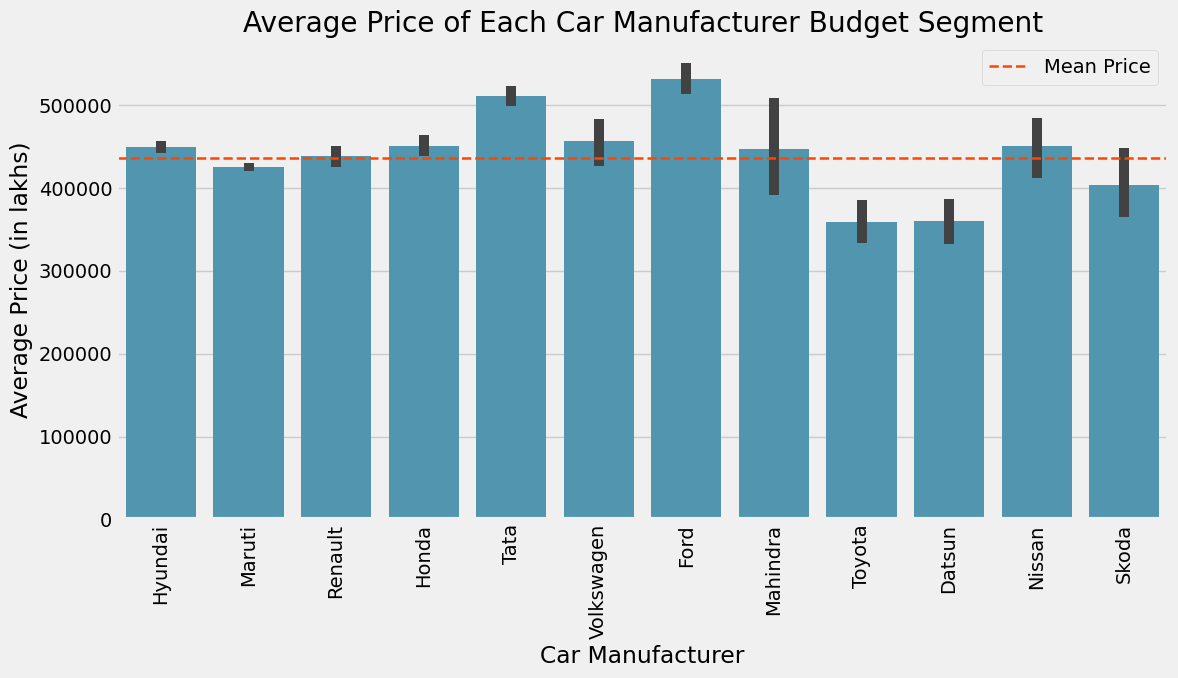

In [40]:
plt.figure(figsize=(12, 7))

sns.barplot(data=filter_df, x='car_manufacturer', y='price', color='#429EBD')

segment_avg_price = filter_df['price'].mean().round(2)
plt.axhline(segment_avg_price, color='orangered', linestyle='--', label='Mean Price', linewidth=1.8)

plt.title('Average Price of Each Car Manufacturer Budget Segment')
plt.xlabel('Car Manufacturer')
plt.ylabel('Average Price (in lakhs)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

### Car Manufacturer's that have average price "below" market average price of budget segement-

In [41]:
filter_df = df[df['segment'] == 'Budget']

segment_market_avg_price = df[df['segment'] == 'Budget']['price'].mean().round(2)

manf_avg_price = filter_df.groupby('car_manufacturer')['price'].mean().round(2).reset_index()

manf_avg_price = manf_avg_price[manf_avg_price['price'] < segment_market_avg_price]['car_manufacturer']

manf_avg_price

0     Datsun
5     Maruti
8      Skoda
10    Toyota
Name: car_manufacturer, dtype: object

### Car Manufacturer's that have average price "above" market average price of budget segement-

In [42]:
filter_df = df[df['segment'] == 'Budget']

segment_market_avg_price = df[df['segment'] == 'Budget']['price'].mean().round(2)

manf_avg_price = filter_df.groupby('car_manufacturer')['price'].mean().round(2).reset_index()

manf_avg_price = manf_avg_price[manf_avg_price['price'] > segment_market_avg_price]['car_manufacturer']

manf_avg_price

1           Ford
2          Honda
3        Hyundai
4       Mahindra
6         Nissan
7        Renault
9           Tata
11    Volkswagen
Name: car_manufacturer, dtype: object

### 💡 Insight

#### Manufacturers Listed Below Market Average Price for Budget Segment:
- Datsun
- Maruti
- Skoda
- Toyota

#### Manufacturers Listed Above or Close to Market Average Price for Budget Segment:
- Ford
- Honda
- Hyundai
- Mahindra
- Nissan
- Renault
- Tata
- Volkswagen

These insights indicate that manufacturers like Ford, Honda, Hyundai, Mahindra, Nissan, Renault, Tata, and Volkswagen tend to have cars listed at higher prices compared to the market average for the budget segment. On the other hand, manufacturers such as Datsun, Maruti, Skoda, and Toyota have cars listed at prices below the market average for the budget segment.

### "Mid-size Type"

In [43]:
filter_df = df[df['segment'] == 'Mid-size']

manf_budg_seg_avg_price = filter_df.groupby('car_manufacturer')['price'].mean().round(2).reset_index()
manf_budg_seg_avg_price

,car_manufacturer,price
0,BMW,1045000.00
1,Ford,785164.06
2,Honda,819454.70
3,Hyundai,870983.38
4,Jeep,1198750.00
5,KIA,1226825.40
6,MG,1319000.00
7,Mahindra,1083394.61
8,Maruti,749258.44
9,Nissan,816836.36


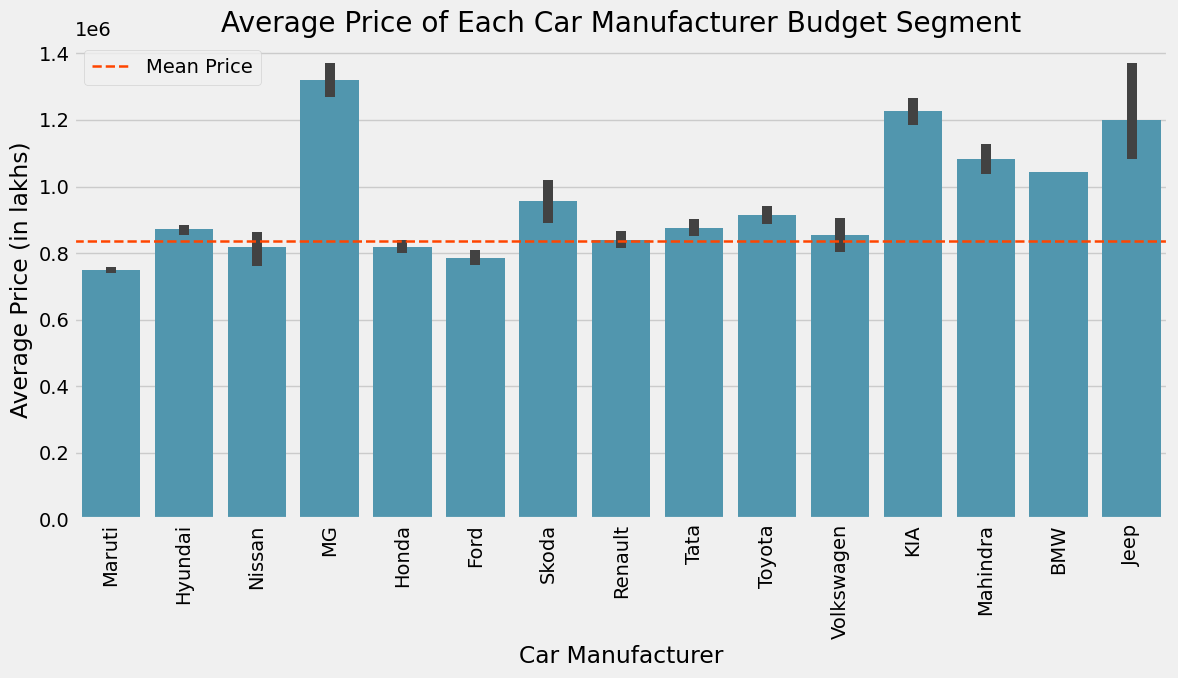

In [44]:
plt.figure(figsize=(12, 7))

sns.barplot(data=filter_df, x='car_manufacturer', y='price', color='#429EBD')

segment_avg_price = filter_df['price'].mean().round()
plt.axhline(segment_avg_price, color='orangered', linestyle='--', label='Mean Price', linewidth=1.8)

plt.title('Average Price of Each Car Manufacturer Budget Segment')
plt.xlabel('Car Manufacturer')
plt.ylabel('Average Price (in lakhs)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

### Car Manufacturer's that have average price "below" market average price of mid-size segement-

In [45]:
filter_df = df[df['segment'] == 'Mid-size']

segment_market_avg_price = df[df['segment'] == 'Mid-size']['price'].mean().round(2)

manf_avg_price = filter_df.groupby('car_manufacturer')['price'].mean().round(2).reset_index()

manf_avg_price = manf_avg_price[manf_avg_price['price'] < segment_market_avg_price]['car_manufacturer']

manf_avg_price

1      Ford
2     Honda
8    Maruti
9    Nissan
Name: car_manufacturer, dtype: object

### Car Manufacturer's that have average price "above" market average price of mid-size segement-

In [46]:
filter_df = df[df['segment'] == 'Mid-size']

segment_market_avg_price = df[df['segment'] == 'Mid-size']['price'].mean().round(2)

manf_avg_price = filter_df.groupby('car_manufacturer')['price'].mean().round(2).reset_index()

manf_avg_price = manf_avg_price[manf_avg_price['price'] > segment_market_avg_price]['car_manufacturer']

manf_avg_price

0            BMW
3        Hyundai
4           Jeep
5            KIA
6             MG
7       Mahindra
10       Renault
11         Skoda
12          Tata
13        Toyota
14    Volkswagen
Name: car_manufacturer, dtype: object

### 💡 Insight

#### Car Manufacturers Listed Below Market Average Price in the Mid-size Segment:
- Ford
- Honda
- Maruti
- Nissan

#### Car Manufacturers Listed Above Market Average Price in the Mid-size Segment:
- BMW
- Hyundai
- Jeep
- KIA
- MG
- Mahindra
- Renault
- Skoda
- Tata
- Toyota
- Volkswagen

These insights suggest that when it comes to the mid-size segment, Ford, Honda, Maruti, and Nissan offer cars with prices below the market average. On the other hand, BMW, Hyundai, Jeep, KIA, MG, Mahindra, Renault, Skoda, Tata, Toyota, and Volkswagen have cars listed above the market average price in this segment.

### Are there any notable differences in price between different fuel types of specific manufacturers?

In [47]:
filter_df = df[df['fuel_type'] != 'LPG']

manf_avg_price_fuel_type = filter_df.groupby(['car_manufacturer', 'fuel_type'])['price'].mean().round().unstack()
manf_avg_price_fuel_type

fuel_type,CNG,Diesel,Petrol
car_manufacturer,,,
BMW,NaN,1045000.0,NaN
Datsun,NaN,NaN,359930.0
Ford,724000.0,736683.0,730443.0
Honda,677267.0,697977.0,688033.0
Hyundai,603360.0,993295.0,639848.0
Jeep,NaN,1557600.0,1667250.0
KIA,NaN,1300375.0,1350556.0
MG,NaN,1402333.0,1690000.0
Mahindra,NaN,1155558.0,1224276.0


<Figure size 1200x1000 with 0 Axes>

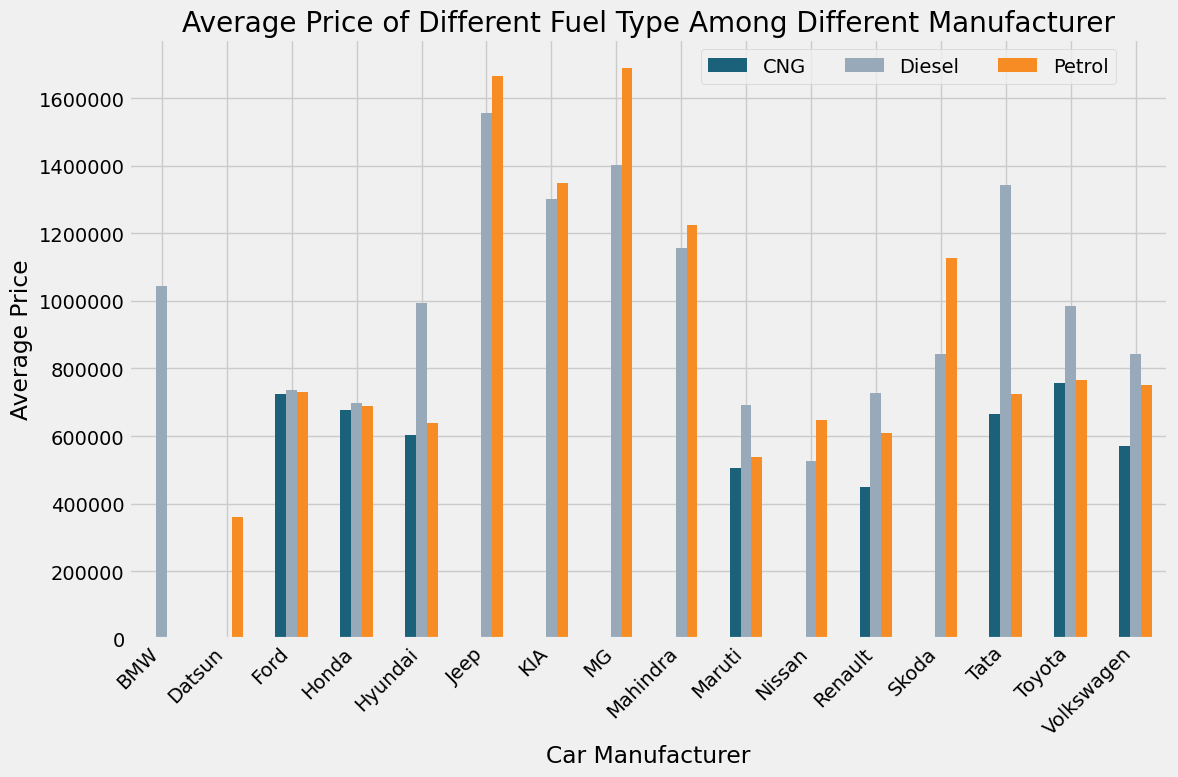

In [48]:
plt.figure(figsize=(12, 10))

colors= ['#1a6179', '#98aab9', '#f88c24']

manf_avg_price_fuel_type.plot(kind='bar', color=colors, figsize=(12, 8))

plt.xlabel('Car Manufacturer')
plt.ylabel('Average Price')
plt.title('Average Price of Different Fuel Type Among Different Manufacturer')
plt.xticks(rotation=45, ha='right')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.0), ncol=3)

# Format y-axis labels in plain form
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

### 💡 Insight

- **BMW**: There is no listings related for BMW cars with CNG or Petrol fuel types. However, the average price for Diesel-fueled BMW cars was found to be approximately 1,045,000 lakhs.

- **Datsun**: There  is no listings related for Datsun cars with CNG or Diesel fuel types. However, the average price for Petrol-fueled Datsun cars was approximately 359,930 lakhs.

- **Ford**: Ford cars showed slight variation in prices across different fuel types. The average prices for CNG, Diesel, and Petrol-fueled Ford cars were approximately 724,000 lakhs 736,683 lakhs and 730,443 lakhs, respectively.

- **Honda**: Similarly, Honda cars displayed minimal differences in prices based on fuel types. The average prices for CNG, Diesel, and Petrol-fueled Honda cars were approximately 677,267, 697,977, and 688,033 lakhs, respectively.

- **Hyundai**: For Hyundai cars, the dataset indicated that CNG-fueled cars had an average price of approximately 603,360 lakhs. Diesel-fueled Hyundai cars had a higher average price of around 993,295 lakhs, while Petrol-fueled cars had an average price of about 639,848 lakhs.

- **Jeep**: The dataset did not provide any information regarding the price of cars with CNG or Petrol fuel types. However, Diesel-fueled Jeep cars had an average price of approximately 1,557,600 lakhs.

- **KIA**: Similar to Jeep, there was no data available for KIA cars with CNG or Petrol fuel types. However, the average price for Diesel-fueled KIA cars was approximately 1,300,375 lakhs.

- **MG**: The dataset did not provide any information regarding the price of cars with CNG fuel type. However, Diesel-fueled MG cars had an average price of approximately 1,402,333 lakhs, while Petrol-fueled cars had an average price of about 1,690,000 lakhs.

- **Mahindra**: There was no data available for Mahindra cars with CNG fuel type. However, the average price for Diesel-fueled Mahindra cars was approximately 1,155,558 lakhs, while Petrol-fueled cars had an average price of about 1,224,276 lakhs.

- **Maruti**: Maruti cars showed noticeable variations in prices across different fuel types. The average prices for CNG, Diesel, and Petrol-fueled Maruti cars were approximately 504,201, 691,308, and 539,311 lakhs, respectively.

- **Nissan**: The dataset did not provide any information regarding the price of cars with CNG fuel type. However, Diesel-fueled Nissan cars had an average price of approximately 526,600 lakhs, while Petrol-fueled cars had an average price of about 647,651 lakhs.

- **Renault**: Renault cars displayed noticeable variations in prices based on fuel types. The average prices for CNG, Diesel, and Petrol-fueled Renault cars were approximately 448,000, 725,917, and 608,739 lakhs, respectively.

- **Skoda**: The dataset did not provide any information regarding the price of cars with CNG fuel type. However, Diesel-fueled Skoda cars had an average price of approximately 841,500 lakhs, while Petrol-fueled cars had an average price of about 1,127,655 lakhs.

- **Tata**: Tata cars showed significant variations in prices across different fuel types. The average prices for CNG, Diesel, and Petrol-fueled Tata cars were approximately 664,364, 1,343,196, and 723,875 lakhs, respectively.

- **Toyota**: Toyota cars displayed minimal differences in prices based on fuel types. The average prices for CNG, Diesel, and Petrol-fueled Toyota cars were approximately 757,333, 986,144, and 766,469 lakhs, respectively.

- **Volkswagen**: Volkswagen cars showed slight variations in prices across different fuel types. The average prices for CNG, Diesel, and Petrol-fueled Volkswagen cars were approximately 569,000, 842,533, and 752,212 lakhs, respectively.

### Is there a significant variation in prices based on fuel types and their respective locations?

In [49]:
filter_df = df[df['fuel_type'] != 'LPG']

city_avg_price_fuel_type = filter_df.groupby(['city', 'fuel_type'])['price'].mean().round().unstack()
city_avg_price_fuel_type

fuel_type,CNG,Diesel,Petrol
city,,,
Ahmedabad,568111.0,1093791.0,633626.0
Bengaluru,594667.0,949662.0,709026.0
Chandigarh,539875.0,705789.0,654848.0
Chennai,745600.0,882633.0,641411.0
Delhi NCR,564756.0,893530.0,586861.0
Hyderabad,642143.0,904527.0,663765.0
Jaipur,498500.0,808111.0,622587.0
Kolkata,654000.0,618967.0,480421.0
Mumbai,506794.0,884051.0,648135.0


<Figure size 1200x1000 with 0 Axes>

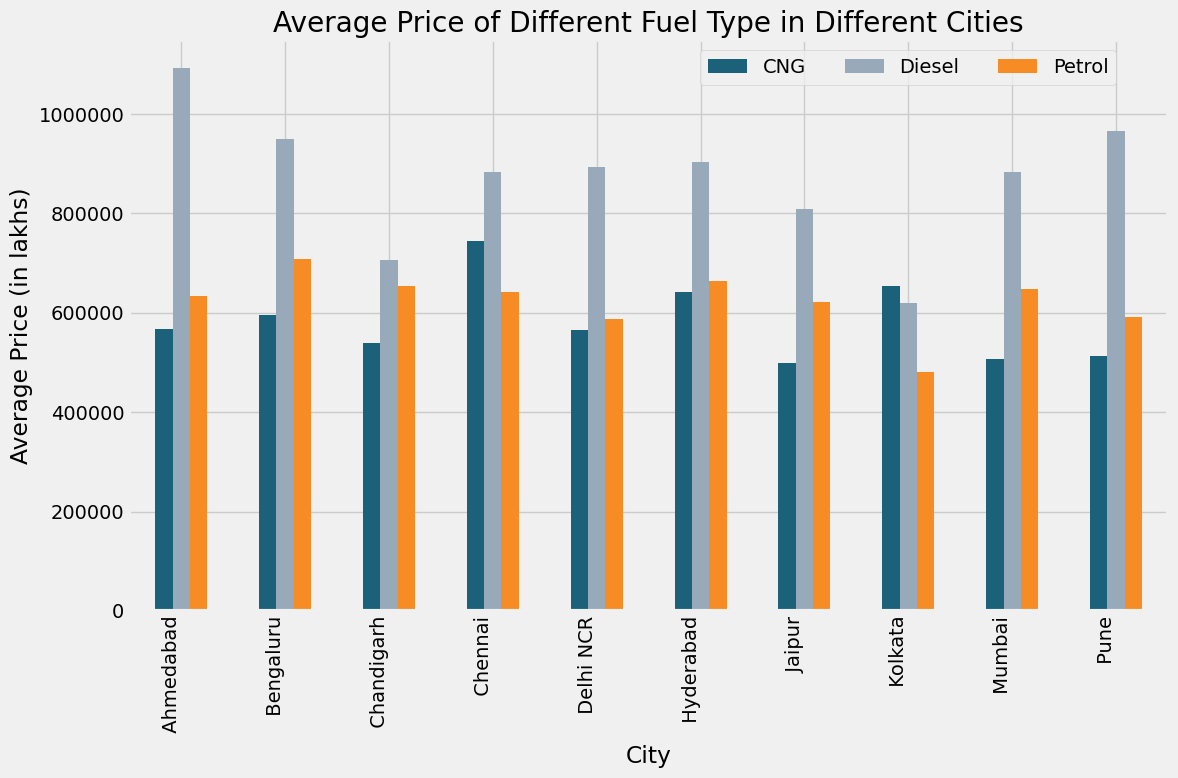

In [50]:
plt.figure(figsize=(12, 10))

colors= ['#1a6179', '#98aab9', '#f88c24']

city_avg_price_fuel_type.plot(kind='bar', color=colors, figsize=(12, 8))

plt.xlabel('City')
plt.ylabel('Average Price (in lakhs)')
plt.title('Average Price of Different Fuel Type in Different Cities')
plt.xticks(rotation=90, ha='right')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.0), ncol=3)

# Format y-axis labels in plain form
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

### 💡 Insight

#### Fuel Type: CNG
- The highest average price for CNG fuel type is observed in Chennai (745,600), followed by Hyderabad (642,143) and Kolkata (654,000).
- The lowest average price for CNG fuel type is found in Jaipur (498,500), with Ahmedabad (568,111) and Delhi NCR (564,756) being relatively close.

#### Fuel Type: Diesel
- The highest average price for Diesel fuel type is observed in Bengaluru (949,662), followed by Hyderabad (904,527) and Pune (966,452).
- The lowest average price for Diesel fuel type is found in Kolkata (618,967), with Chandigarh (705,789) and Jaipur (808,111) having relatively lower prices.

#### Fuel Type: Petrol
- The highest average price for Petrol fuel type is observed in Bengaluru (709,026), followed by Chennai (641,411) and Ahmedabad (633,626).
- The lowest average price for Petrol fuel type is found in Kolkata (480,421), with Delhi NCR (586,861) and Pune (592,313) having relatively lower prices.

### Which car models have the highest and lowest average prices based on the fuel type?

### "Petrol Type"

In [51]:
filter_df = df[df['fuel_type'] == 'Petrol']

filter_df.loc[:, 'price_lakh'] = filter_df['price'] / 100000

model_avg_price_fuel_type = filter_df.groupby(['car_model', 'fuel_type'])['price_lakh'].mean().reset_index()
model_avg_price_fuel_type = model_avg_price_fuel_type.sort_values('price_lakh', ascending=False)

#### Car models that have the highest average price among petrol fuel type?

In [52]:
highest_avg_price = model_avg_price_fuel_type.head(10)
highest_avg_price

,car_model,fuel_type,price_lakh
1,ALCAZAR,Petrol,19.035000
97,XUV700,Petrol,17.707500
43,HECTOR PLUS,Petrol,16.900000
22,Civic,Petrol,16.686000
24,Compass,Petrol,16.672500
72,SLAVIA,Petrol,16.336000
77,TAIGUN,Petrol,16.082222
47,KUSHAQ,Petrol,15.605000
82,Thar,Petrol,15.167350
63,Octavia,Petrol,14.640000


#### Car models that have the lowest average price among petrol fuel type?

In [53]:
lowest_avg_price = model_avg_price_fuel_type.tail(10)
lowest_avg_price

,car_model,fuel_type,price_lakh
68,Ritz,Petrol,3.205217
6,Alto K10,Petrol,3.167455
102,i10,Petrol,3.150369
32,Eon,Petrol,3.035897
5,Alto 800,Petrol,2.911923
62,OMNI E,Petrol,2.533333
74,Santro Xing,Petrol,2.460000
0,A Star,Petrol,2.148000
92,Wagon R,Petrol,1.960000
100,Zen Estilo,Petrol,1.692000


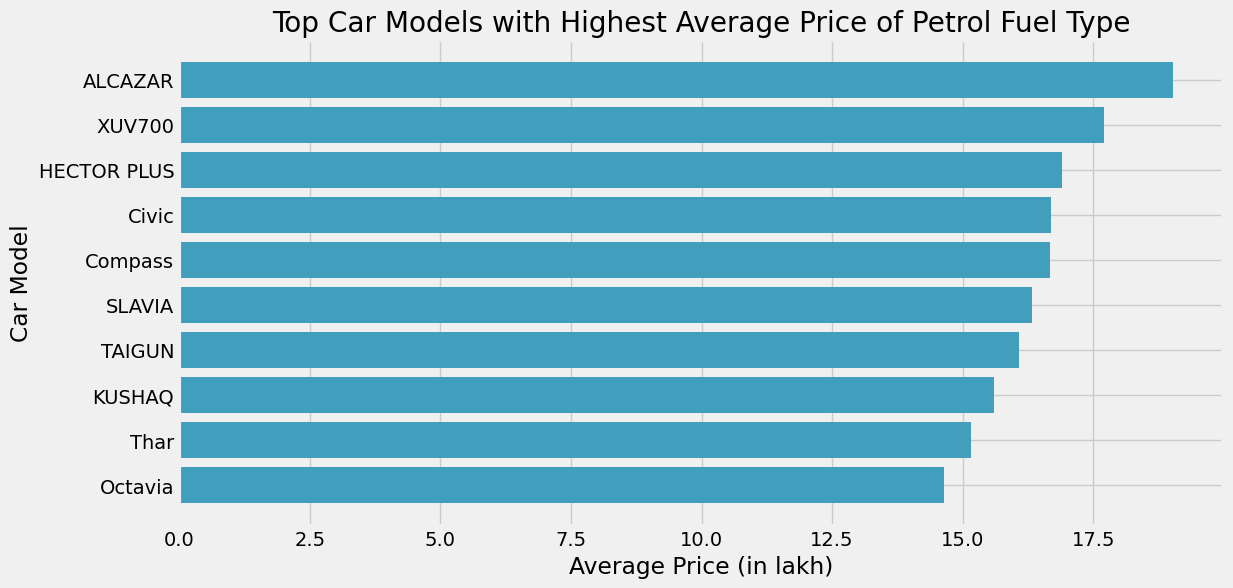

In [54]:
plt.figure(figsize=(12, 6))

model_avg_price_fuel_type = model_avg_price_fuel_type.head(10)

# Reverse the order of the DataFrame
model_avg_price_fuel_type = model_avg_price_fuel_type.iloc[::-1]

plt.barh(model_avg_price_fuel_type['car_model'], model_avg_price_fuel_type['price_lakh'], color='#429EBD')

plt.xlabel('Average Price (in lakh)')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Average Price of Petrol Fuel Type')
plt.show()

### 💡 Insight

#### Car models with the highest average prices among petrol fuel type:
- ALCAZAR: The car model ALCAZAR has the highest average price among petrol fuel type, with an average price of 19.035 lakh.
- XUV700: The XUV700 follows closely with an average price of 17.7075 lakh.
- HECTOR PLUS: The HECTOR PLUS ranks third with an average price of 16.9 lakh.
- Civic: The Civic is the fourth car model on the list, with an average price of 16.686 lakh.
- Compass: The Compass stands at fifth place with an average price of 16.6725 lakh.
- SLAVIA: The SLAVIA secures the sixth spot with an average price of 16.336 lakh.
- TAIGUN: The TAIGUN takes the seventh position with an average price of 16.082222 lakh.
- KUSHAQ: The KUSHAQ follows closely with an average price of 15.605 lakh.
- Thar: The Thar ranks ninth on the list, with an average price of 15.16735 lakh.
- Octavia: The Octavia completes the list of car models with the highest average prices among petrol fuel type, with an average price of 14.64 lakh.

#### Car models with the lowest average prices among petrol fuel type:
- Ritz: The car model Ritz has the lowest average price among petrol fuel type, with an average price of 3.205217 lakh.
- Alto K10: The Alto K10 follows closely with an average price of 3.167455 lakh.
- i10: The i10 ranks third with an average price of 3.150369 lakh.
- Eon: The Eon stands at fourth place with an average price of 3.035897 lakh.
- Alto 800: The Alto 800 secures the fifth spot with an average price of 2.911923 lakh.
- OMNI E: The OMNI E takes the sixth position with an average price of 2.533333 lakh.
- Santro Xing: The Santro Xing ranks seventh on the list, with an average price of 2.46 lakh.
- A Star: The A Star follows closely with an average price of 2.148 lakh.
- Wagon R: The Wagon R secures the ninth spot with an average price of 1.96 lakh.
- Zen Estilo: The Zen Estilo completes the list of car models with the lowest average prices among petrol fuel type, with an average price of 1.692 lakh.

### "Diesel Type"

In [55]:
filter_df = df[df['fuel_type'] == 'Diesel']

filter_df.loc[:, 'price_lakh'] = filter_df['price'] / 100000

model_avg_price_fuel_type = filter_df.groupby(['car_model', 'fuel_type'])['price_lakh'].mean().reset_index()
model_avg_price_fuel_type = model_avg_price_fuel_type.sort_values('price_lakh', ascending=False)

#### Car models that have the highest average price among diesel fuel type?

In [56]:
highest_avg_price = model_avg_price_fuel_type.head(10)
highest_avg_price

,car_model,fuel_type,price_lakh
24,GRAND CHEROKEE,Diesel,27.030000
47,SCORPIO-N,Diesel,22.500000
20,Endeavour,Diesel,22.040000
1,ALCAZAR,Diesel,20.284286
33,Innova Crysta,Diesel,20.218600
50,Safari,Diesel,20.182923
55,TIGUAN,Diesel,18.535000
29,Harrier,Diesel,17.249091
60,Tucson New,Diesel,16.781429
28,HECTOR PLUS,Diesel,15.690000


#### Car models that have the lowest average price among diesel fuel type?

In [57]:
lowest_avg_price = model_avg_price_fuel_type.tail(10)
lowest_avg_price

,car_model,fuel_type,price_lakh
59,Tiago,Diesel,4.946667
26,Grand i10,Diesel,4.594545
36,Kuv100,Diesel,4.430000
15,Cross Polo,Diesel,4.270000
35,Jetta,Diesel,4.205000
22,Etios Liva,Diesel,4.160000
69,i20,Diesel,4.100000
52,Sunny,Diesel,4.010000
43,Pulse,Diesel,3.560000
45,Ritz,Diesel,3.405000


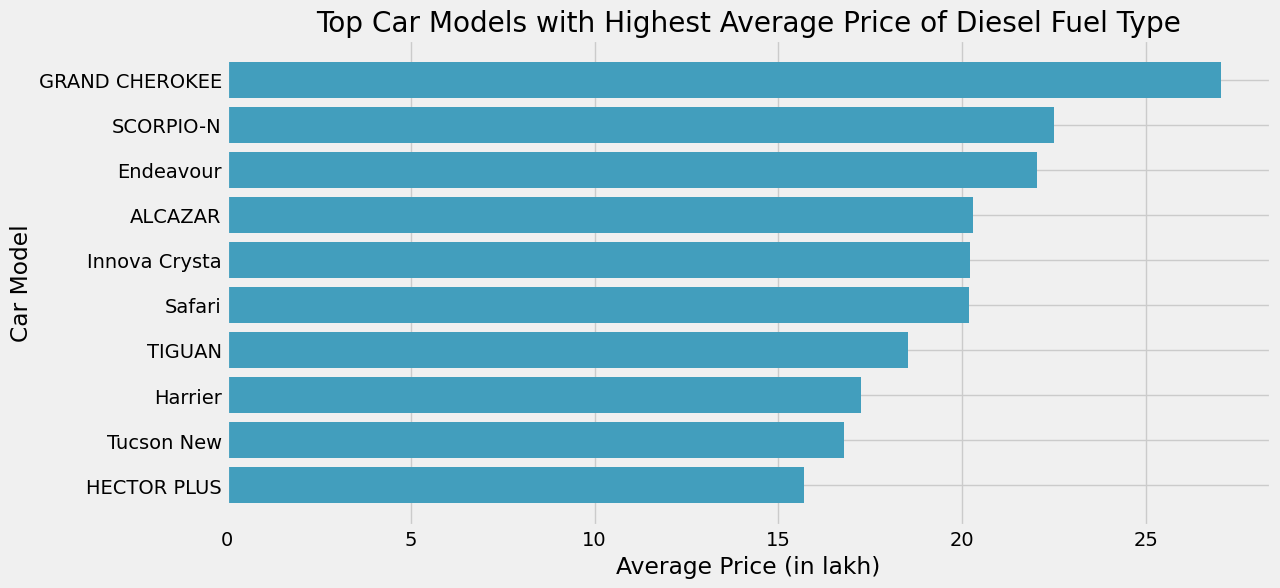

In [58]:
plt.figure(figsize=(12, 6))

model_avg_price_fuel_type = model_avg_price_fuel_type.head(10)

# Reverse the order of the DataFrame
model_avg_price_fuel_type = model_avg_price_fuel_type.iloc[::-1]

plt.barh(model_avg_price_fuel_type['car_model'], model_avg_price_fuel_type['price_lakh'], color='#429EBD')

plt.xlabel('Average Price (in lakh)')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Average Price of Diesel Fuel Type')
plt.show()

### 💡 Insight

#### Car models with the highest average prices among Diesel fuel type:
- GRAND CHEROKEE: The car model with the highest average price among Diesel fuel type is the GRAND CHEROKEE, with an average price of 27.03 lakh.
- SCORPIO-N: Following closely is the SCORPIO-N, with an average price of 22.5 lakh.
- Endeavour: The car model Endeavour ranks third with an average price of 22.04 lakh.
- ALCAZAR: ALCAZAR secures the fourth position with an average price of 20.28 lakh.
- Innova Crysta: With an average price of 20.22 lakh, the Innova Crysta holds the fifth position among the Diesel fuel type car models.
- Safari, TIGUAN, Harrier, Tucson New, and HECTOR PLUS: These car models also have relatively high average prices, ranging from 20.18 lakh to 15.69 lakh.

#### Car models with the lowest average prices among Diesel fuel type:
- Tiago: Among the Diesel fuel type cars, the Tiago has the lowest average price, at 4.95 lakh.
- Grand i10: Following closely is the Grand i10, with an average price of 4.59 lakh.
- Kuv100: The Kuv100 ranks third among the lowest average prices, with a price of 4.43 lakh.
- Cross Polo, Jetta, Etios Liva, and i20: These car models also have relatively low average prices, ranging from 4.27 lakh to 4.10 lakh.
- Sunny, Pulse, and Ritz: These car models complete the list of lowest average prices among Diesel fuel type, ranging from 4.01 lakh to 3.41 lakh.

### "CNG Type"

In [59]:
filter_df = df[df['fuel_type'] == 'CNG']

filter_df.loc[:, 'price_lakh'] = filter_df['price'] / 100000

model_avg_price_fuel_type = filter_df.groupby(['car_model', 'fuel_type'])['price_lakh'].mean().reset_index()
model_avg_price_fuel_type = model_avg_price_fuel_type.sort_values('price_lakh', ascending=False)

#### Car models that have the highest average price among CNG fuel type?

In [60]:
highest_avg_price = model_avg_price_fuel_type.head(10)
highest_avg_price

,car_model,fuel_type,price_lakh
11,Creta,CNG,11.900000
33,VENUE,CNG,10.210000
25,NEXON,CNG,9.680000
38,YARIS,CNG,9.340000
12,Dzire,CNG,8.990000
31,TIGOR,CNG,8.590000
16,Ertiga,CNG,8.366667
35,WR-V,CNG,8.040000
0,AURA,CNG,7.776667
23,NEW I20,CNG,7.650000


#### Car models that have the lowest average price among CNG fuel type?

In [61]:
lowest_avg_price = model_avg_price_fuel_type.tail(10)
lowest_avg_price

,car_model,fuel_type,price_lakh
21,Jazz,CNG,5.100000
4,Amaze,CNG,5.010000
27,S PRESSO,CNG,5.006667
22,Kwid,CNG,4.480000
1,Alto,CNG,4.373462
36,Wagon R 1.0,CNG,3.905818
3,Alto K10,CNG,3.498571
39,i10,CNG,2.925000
2,Alto 800,CNG,2.902500
28,Santro Xing,CNG,2.060000


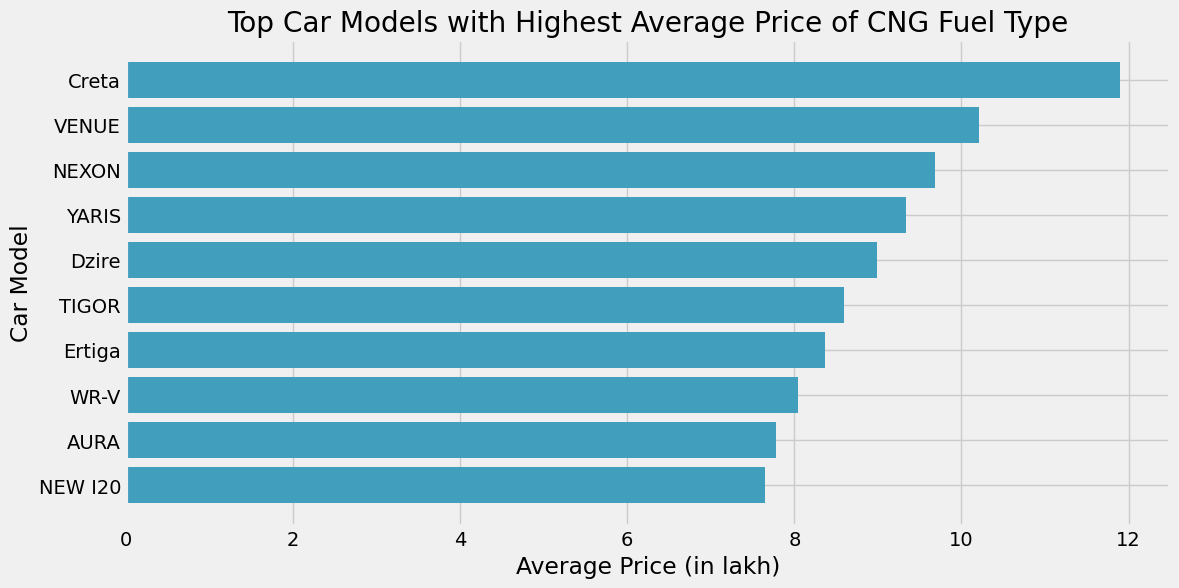

In [62]:
plt.figure(figsize=(12, 6))

model_avg_price_fuel_type = model_avg_price_fuel_type.head(10)

# Reverse the order of the DataFrame
model_avg_price_fuel_type = model_avg_price_fuel_type.iloc[::-1]

plt.barh(model_avg_price_fuel_type['car_model'], model_avg_price_fuel_type['price_lakh'], color='#429EBD')

plt.xlabel('Average Price (in lakh)')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Average Price of CNG Fuel Type')
plt.show()

### 💡 Insight

#### Car models with the highest average prices among CNG fuel type:
- Creta - The car model Creta has the highest average price of 11.90 lakh.
- VENUE - The car model VENUE has an average price of 10.21 lakh.
- NEXON - The car model NEXON has an average price of 9.68 lakh.
- YARIS - The car model YARIS has an average price of 9.34 lakh.
- Dzire - The car model Dzire has an average price of 8.99 lakh.
- TIGOR - The car model TIGOR has an average price of 8.59 lakh.
- Ertiga - The car model Ertiga has an average price of 8.37 lakh.
- WR-V - The car model WR-V has an average price of 8.04 lakh.
- AURA - The car model AURA has an average price of 7.78 lakh.
- NEW I20 - The car model NEW I20 has an average price of 7.65 lakh.

#### Car models with the lowest average prices among CNG fuel type:
- Jazz - The car model Jazz has the lowest average price of 5.10 lakh.
- Amaze - The car model Amaze has an average price of 5.01 lakh.
- S PRESSO - The car model S PRESSO has an average price of 5.01 lakh.
- Kwid - The car model Kwid has an average price of 4.48 lakh.
- Alto - The car model Alto has an average price of 4.37 lakh.
- Santro Xing, Alto 800, i10, Alto K10, Wagon R 1.0 - These car models complete the list of lowest average prices among Diesel fuel type, ranging from 2 lakh to 3.9 lakh.

### Are there any notable differences in price between different transmission types of specific manufacturers?

In [63]:
manf_avg_price_transmission_type = df.groupby(['car_manufacturer', 'transmission_type'])['price'].mean().round().unstack()
manf_avg_price_transmission_type

transmission_type,Automatic,Manual
car_manufacturer,,
BMW,1045000.0,NaN
Datsun,409600.0,353873.0
Ford,776103.0,719511.0
Honda,874088.0,608968.0
Hyundai,934291.0,614399.0
Jeep,1852833.0,1113333.0
KIA,1531719.0,1223255.0
MG,1690000.0,1402333.0
Mahindra,1474915.0,1080097.0


<Figure size 1200x1000 with 0 Axes>

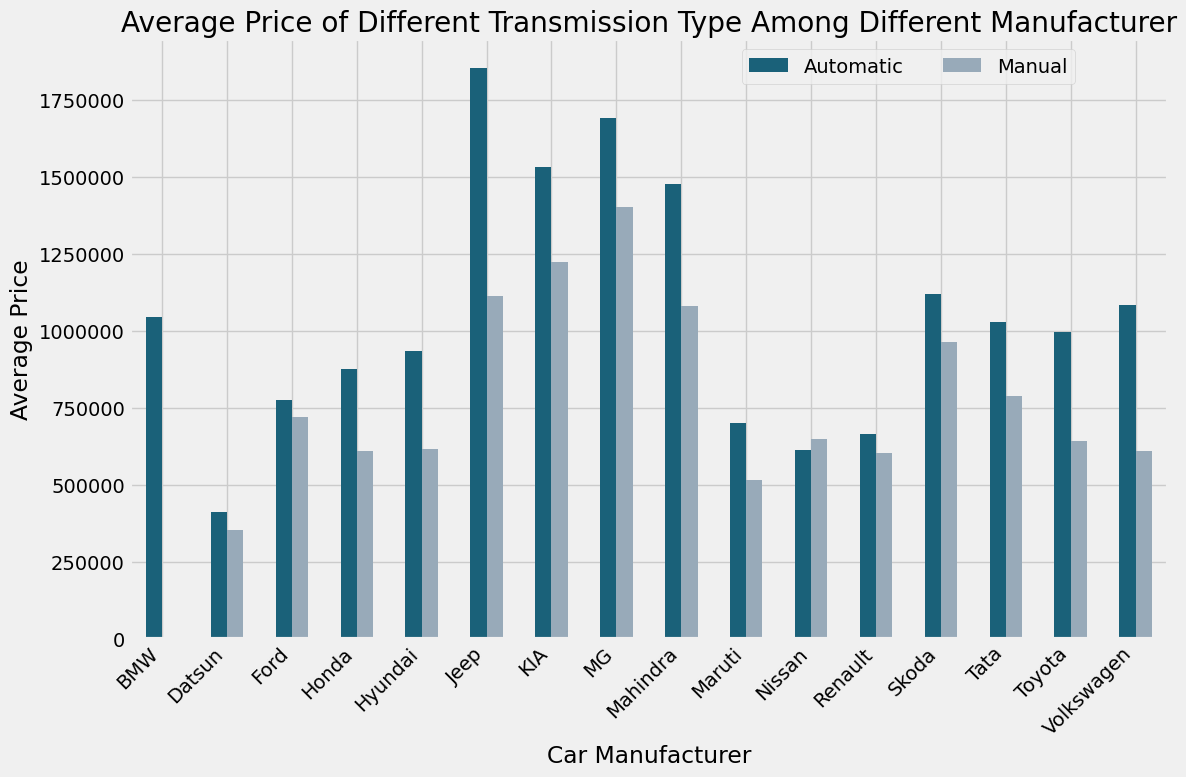

In [64]:
plt.figure(figsize=(12, 10))

colors= ['#1a6179', '#98aab9']

manf_avg_price_transmission_type.plot(kind='bar', color=colors, figsize=(12, 8))

plt.xlabel('Car Manufacturer')
plt.ylabel('Average Price')
plt.title('Average Price of Different Transmission Type Among Different Manufacturer')
plt.xticks(rotation=45, ha='right')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.0), ncol=3)

# Format y-axis labels in plain form
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

### 💡 Insight
The following insights highlight the variations in prices (in lakh) between the Automatic and Manual transmission types:

- **BMW**: Only automatic transmission cars were available in the dataset, with an average price of ₹10.45 lakh.
- **Datsun**: Both automatic and manual transmission cars were listed. The average price for automatic cars was ₹4.09 lakh, while the average price for manual cars was ₹3.54 lakh.
- **Ford**: Automatic transmission cars had an average price of ₹7.76 lakh, while manual transmission cars had an average price of ₹7.20 lakh.
- **Honda**: Automatic transmission cars were priced higher, with an average of ₹8.74 lakh, compared to manual transmission cars with an average price of ₹6.08 lakh.
- **Hyundai**: Automatic transmission cars had an average price of ₹9.34 lakh, whereas manual transmission cars had an average price of ₹6.14 lakh.
- **Jeep**: Automatic transmission cars had a significantly higher average price of ₹18.53 lakh, whereas manual transmission cars had an average price of ₹11.13 lakh.
- **KIA**: Automatic transmission cars were priced higher, with an average of ₹15.31 lakh, compared to manual transmission cars with an average price of ₹12.23 lakh.
- **MG**: Automatic transmission cars had a higher average price of ₹16.90 lakh, whereas manual transmission cars had an average price of ₹14.02 lakh.
- **Mahindra**: Automatic transmission cars were priced higher, with an average of ₹14.75 lakh, compared to manual transmission cars with an average price of ₹10.80 lakh.
- **Maruti**: Automatic transmission cars had an average price of ₹6.99 lakh, whereas manual transmission cars had an average price of ₹5.17 lakh.
- **Nissan**: Automatic transmission cars had a slightly lower average price of ₹6.11 lakh, compared to manual transmission cars with an average price of ₹6.48 lakh.
- **Renault**: Automatic transmission cars had an average price of ₹6.65 lakh, whereas manual transmission cars had an average price of ₹6.03 lakh.
- **Skoda**: Automatic transmission cars were priced higher, with an average of ₹11.19 lakh, compared to manual transmission cars with an average price of ₹9.63 lakh.
- **Tata**: Automatic transmission cars had an average price of ₹10.26 lakh, whereas manual transmission cars had an average price of ₹7.87 lakh.
- **Toyota**: Automatic transmission cars were priced higher, with an average of ₹9.94 lakh, compared to manual transmission cars with an average price of ₹6.42 lakh.
- **Volkswagen**: Automatic transmission cars had a higher average price of ₹10.83 lakh, whereas manual transmission cars had an average price of ₹6.08 lakh.

### Is there a significant variation in prices based on transmission types and their respective locations?

In [65]:
city_avg_price_transmission_type = df.groupby(['city', 'transmission_type'])['price'].mean().round().unstack()
city_avg_price_transmission_type

transmission_type,Automatic,Manual
city,,
Ahmedabad,961366.0,605697.0
Bengaluru,878422.0,681099.0
Chandigarh,864719.0,619224.0
Chennai,838520.0,630805.0
Delhi NCR,825086.0,577117.0
Hyderabad,893875.0,625165.0
Jaipur,959522.0,587731.0
Kolkata,701655.0,471997.0
Mumbai,873961.0,581496.0


<Figure size 1200x1000 with 0 Axes>

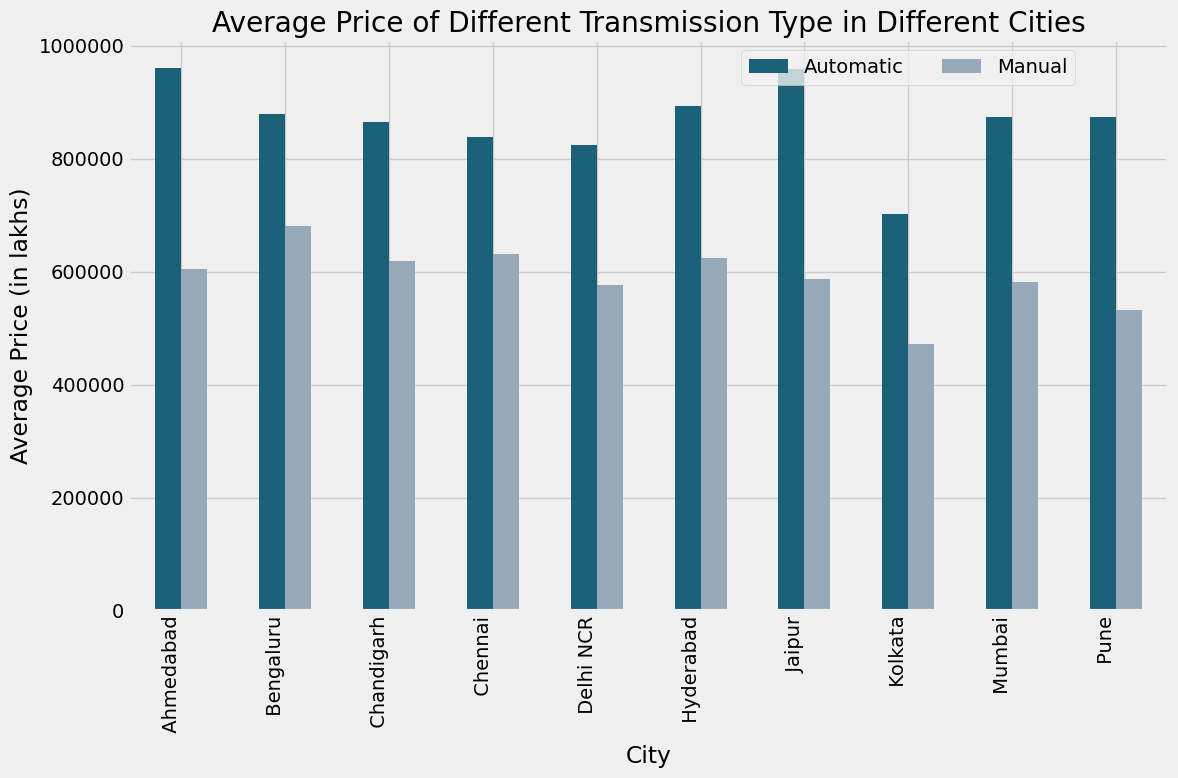

In [66]:
plt.figure(figsize=(12, 10))

colors= ['#1a6179', '#98aab9']

city_avg_price_transmission_type.plot(kind='bar', color=colors, figsize=(12, 8))

plt.xlabel('City')
plt.ylabel('Average Price (in lakhs)')
plt.title('Average Price of Different Transmission Type in Different Cities')
plt.xticks(rotation=90, ha='right')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.0), ncol=3)

# Format y-axis labels in plain form
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

### 💡 Insight

When comparing the prices based on transmission types, we observe that the average price for cars with an Automatic transmission is consistently higher than those with a Manual transmission. This price difference holds true for almost all cities in the dataset. Looking at the data, it is clear that the prices for cars with an Automatic transmission are generally higher than those with a Manual transmission. 

#### Automatic Transmission:
- The highest average price for cars with automatic transmission is observed in Ahmedabad, with an average price of 9.61 lakh.
- Bengaluru follows closely with an average price of 8.78 lakh for cars with automatic transmission.
- Other cities with relatively higher average prices for automatic transmission cars include Hyderabad (8.94 lakh), Jaipur (9.59 lakh), and Mumbai (8.74 lakh).
- The lowest average price for cars with automatic transmission is found in Kolkata, with an average price of 7.02 lakh.

#### Manual Transmission:
- For cars with manual transmission, the highest average price is observed in Bengaluru, with an average price of 6.81 lakh.
- Hyderabad and Chennai also have relatively higher average prices for manual transmission cars, with prices of 6.25 lakh and 6.31 lakh, respectively.
- Kolkata has the lowest average price for cars with manual transmission, with an average price of 4.72 lakh.

### Which car models have the highest and lowest average prices based on the transmission type?

### "Manual Transmission Type"

In [67]:
filter_df = df[df['transmission_type'] == 'Manual']

filter_df.loc[:, 'price_lakh'] = filter_df['price'] / 100000

model_avg_price_transmission_type = filter_df.groupby(['car_model', 'transmission_type'])['price_lakh'].mean().reset_index()
model_avg_price_transmission_type = model_avg_price_transmission_type.sort_values('price_lakh', ascending=False)

#### Car models that have the highest average price among manual transmission type?

In [68]:
highest_avg_price = model_avg_price_transmission_type.head(10)
highest_avg_price

,car_model,transmission_type,price_lakh
33,Endeavour,Manual,22.040000
1,ALCAZAR,Manual,19.132000
80,Safari,Manual,18.717500
108,XUV700,Manual,17.707500
51,Innova Crysta,Manual,17.384333
86,TAIGUN,Manual,15.776667
46,HECTOR PLUS,Manual,15.690000
47,Harrier,Manual,15.653077
54,KUSHAQ,Manual,15.605000
82,Scorpio,Manual,14.127143


#### Car models that have the lowest price among manual transmission type?

In [69]:
lowest_avg_price = model_avg_price_transmission_type.tail(10)
lowest_avg_price

,car_model,transmission_type,price_lakh
113,i10,Manual,3.070326
34,Eon,Manual,3.035897
5,Alto 800,Manual,2.911399
42,Go,Manual,2.908000
61,Micra,Manual,2.625000
69,OMNI E,Manual,2.533333
81,Santro Xing,Manual,2.415556
0,A Star,Manual,1.967500
102,Wagon R,Manual,1.960000
111,Zen Estilo,Manual,1.692000


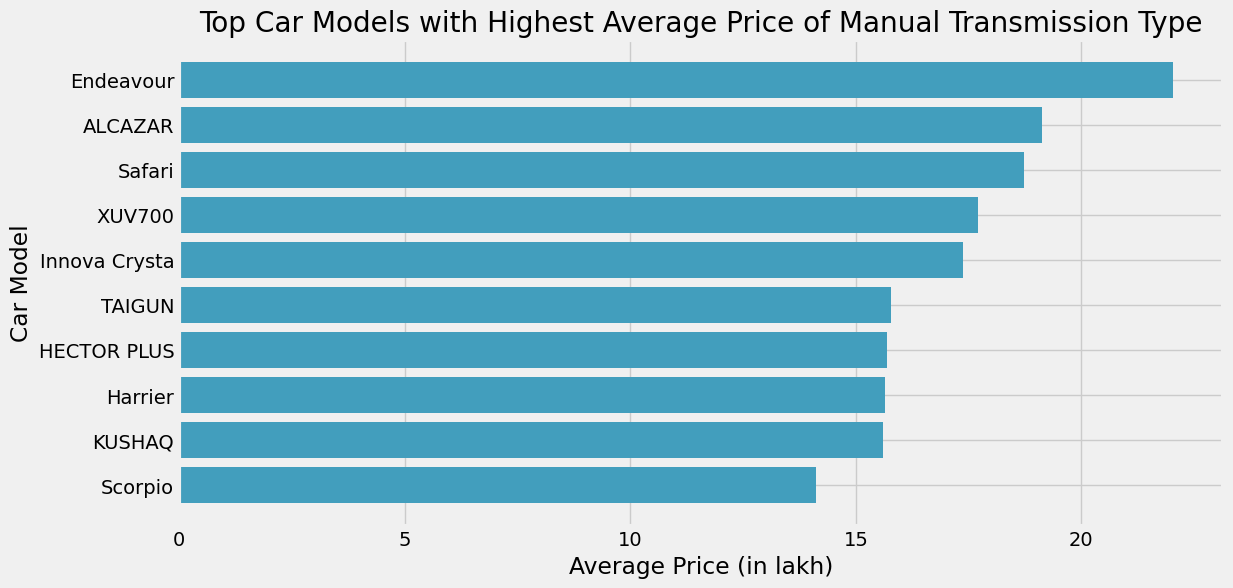

In [70]:
plt.figure(figsize=(12, 6))

model_avg_price_transmission_type = model_avg_price_transmission_type.head(10)

# Reverse the order of the DataFrame
model_avg_price_transmission_type = model_avg_price_transmission_type.iloc[::-1]

plt.barh(model_avg_price_transmission_type['car_model'], model_avg_price_transmission_type['price_lakh'], color='#429EBD')

plt.xlabel('Average Price (in lakh)')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Average Price of Manual Transmission Type')
plt.show()

### 💡 Insight

#### Car models with the highest average prices among manual transmission type:
- **Endeavour**: The Ford Endeavour has the highest average price among cars with manual transmission type, with an average price of 22.04 lakh.
- **ALCAZAR**: The ALCAZAR model comes second with an average price of 19.132 lakh.
- **Safari**: The Tata Safari ranks third with an average price of 18.7175 lakh.
- **XUV700**: The Mahindra XUV700 follows closely with an average price of 17.7075 lakh.
- **Innova Crysta**: The Toyota Innova Crysta is in fifth place with an average price of 17.3843 lakh.
- TAIGUN, HECTOR PLUS, Harrier, KUSHAQ, and Scorpio are also among the car models with the highest average prices among manual transmission type.

#### Car models with the lowest prices among manual transmission type:
- **i10**: The Hyundai i10 has the lowest average price among cars with manual transmission type, with an average price of 3.070326 lakh.
- **Eon**: The Hyundai Eon follows closely with an average price of 3.035897 lakh.
- **Alto 800**: The Maruti Suzuki Alto 800 ranks third with an average price of 2.911399 lakh.
- **Go**: The Datsun Go is in fourth place with an average price of 2.908 lakh.
- **Micra**: The Nissan Micra is in fifth place with an average price of 2.625 lakh.
- OMNI E, Santro Xing, A Star, Wagon R, and Zen Estilo are also among the car models with the lowest prices among manual transmission type.

### "Automatic Transmission Type"

In [71]:
filter_df = df[df['transmission_type'] == 'Automatic']

filter_df.loc[:, 'price_lakh'] = filter_df['price'] / 100000

model_avg_price_transmission_type = filter_df.groupby(['car_model', 'transmission_type'])['price_lakh'].mean().reset_index()
model_avg_price_transmission_type = model_avg_price_transmission_type.sort_values('price_lakh', ascending=False)

#### Car models that have the highest average price among automatic transmission type?

In [72]:
highest_avg_price = model_avg_price_transmission_type.head(10)
highest_avg_price

,car_model,transmission_type,price_lakh
28,GRAND CHEROKEE,Automatic,27.030000
37,Innova Crysta,Automatic,24.470000
57,SCORPIO-N,Automatic,22.500000
2,ALCAZAR,Automatic,21.100000
61,Safari,Automatic,20.834222
34,Harrier,Automatic,19.554444
66,TIGUAN,Automatic,18.535000
33,HECTOR PLUS,Automatic,16.900000
20,Compass,Automatic,16.828000
19,Civic,Automatic,16.686000


#### Car models that have the highest lowest price among automatic transmission type?

In [73]:
lowest_avg_price = model_avg_price_transmission_type.tail(10)
lowest_avg_price

,car_model,transmission_type,price_lakh
31,Go,Automatic,5.150000
15,Celerio,Automatic,4.741323
40,Kwid,Automatic,4.723607
42,Micra,Automatic,4.643333
76,Wagon R 1.0,Automatic,4.341111
54,Redi Go,Automatic,3.832500
5,Alto K10,Automatic,3.682500
81,i10,Automatic,3.558625
11,Brio,Automatic,3.190000
1,A Star,Automatic,2.870000


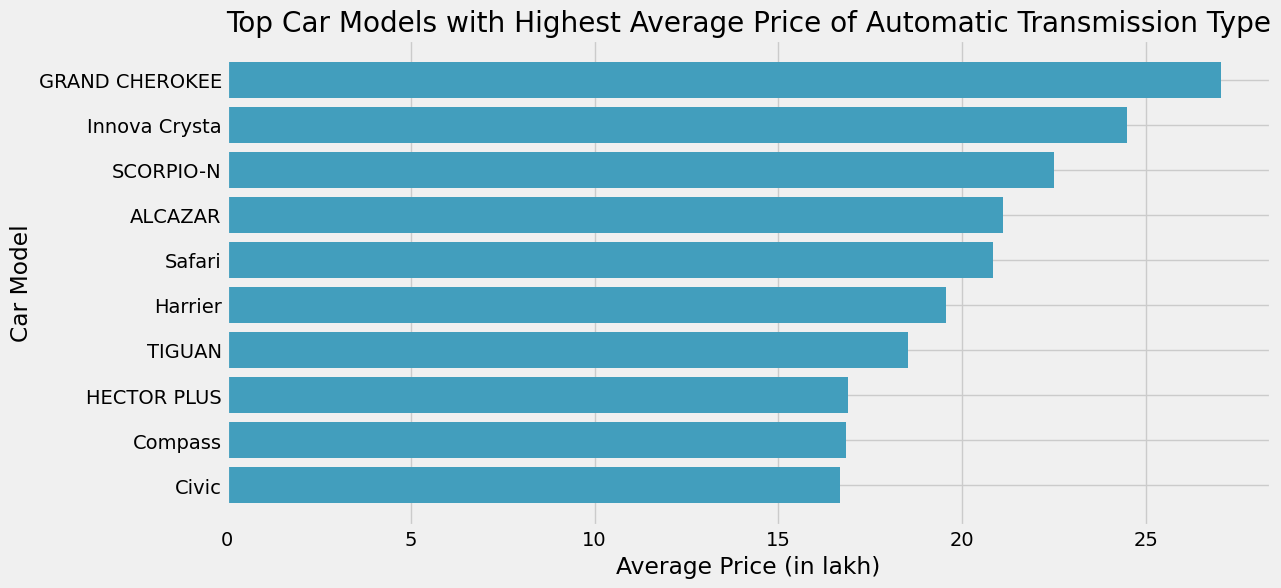

In [74]:
plt.figure(figsize=(12, 6))

model_avg_price_transmission_type = model_avg_price_transmission_type.head(10)

# Reverse the order of the DataFrame
model_avg_price_transmission_type = model_avg_price_transmission_type.iloc[::-1]

plt.barh(model_avg_price_transmission_type['car_model'], model_avg_price_transmission_type['price_lakh'], color='#429EBD')

plt.xlabel('Average Price (in lakh)')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Average Price of Automatic Transmission Type')
plt.show()

### 💡 Insight

#### Car Models with the Highest Average Price (Automatic Transmission Type):
- **GRAND CHEROKEE**: This car model has the highest average price among the automatic transmission type, with an average price of 27.03 lakh.
- **Innova Crysta**: It is the second-highest priced car model among the automatic transmission type, with an average price of 24.47 lakh.
- **SCORPIO-N**: This car model ranks third in terms of the highest average price, with an average price of 22.5 lakh.
- **ALCAZAR**: The ALCAZAR model holds the fourth position with an average price of 21.1 lakh.
- **Safari**: With an average price of 20.834 lakh, the Safari model secures the fifth position.
- Harrier, TIGUAN, HECTOR PLUS, Compass, and Civic are among the other car models with relatively high average prices, ranging from 16.686 lakh to 19.554 lakh.

#### Car Models with the Lowest Price (Automatic Transmission Type):
- **Go**: Among the car models with automatic transmission, the Go has the lowest average price, with a value of 5.15 lakh.
- **Celerio**: It is the second-lowest priced car model, with an average price of 4.741 lakh.
- Kwid, Micra, and Wagon R 1.0 follow closely with average prices ranging from 4.341 lakh to 4.723 lakh.
- Redi Go, Alto K10, i10, Brio, and A Star are among the other car models with relatively low average prices, ranging from 2.87 lakh to 3.682 lakh.

### Which city offers the highest average summer discount?

In [75]:
city_summer_discount = df.groupby('city')['summer_discount'].mean().round().sort_values(ascending=False)
city_summer_discount

city
 Jaipur        74487.0
 Chandigarh    60344.0
 Kolkata       59567.0
 Mumbai        59189.0
 Bengaluru     56683.0
 Ahmedabad     50740.0
 Pune          50367.0
 Chennai       48733.0
 Hyderabad     45767.0
 Delhi NCR     42607.0
Name: summer_discount, dtype: float64

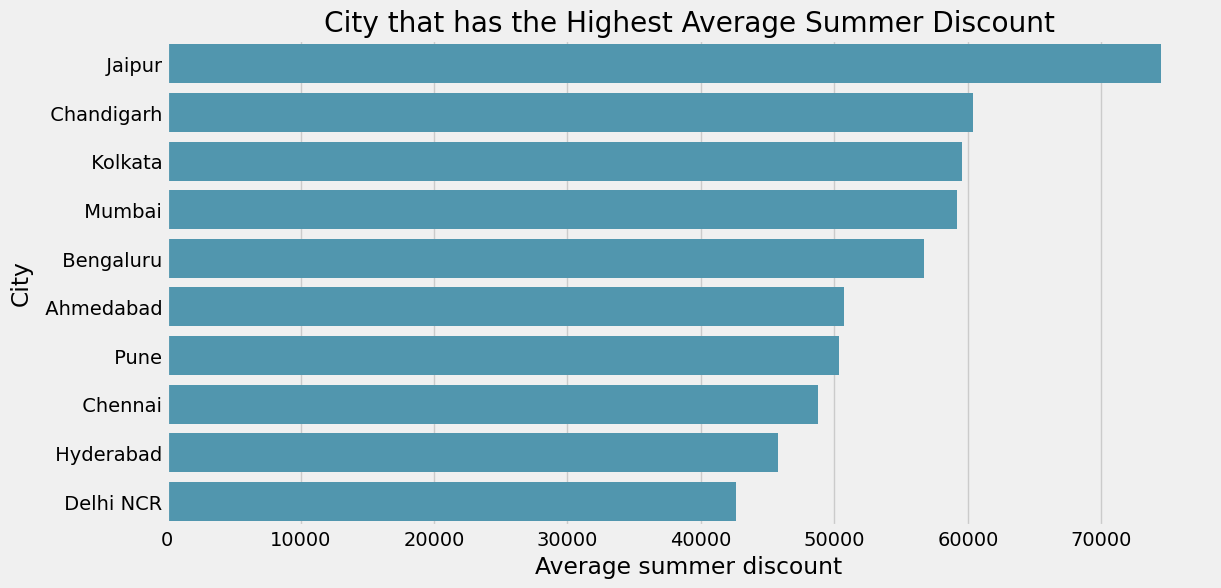

In [76]:
plt.figure(figsize=(12, 6))

sns.barplot(y=city_summer_discount.index, x=city_summer_discount.values, color='#429EBD')

plt.xlabel('Average summer discount')
plt.ylabel('City')
plt.title('City that has the Highest Average Summer Discount')
plt.show()

### 💡 Insight

The city of Jaipur stands out as the city with the highest average summer discount, amounting to 74,487 INR. This means that car buyers in Jaipur can expect to save a significant amount of money when purchasing a used car during the summer season.

Following Jaipur, the city of Chandigarh offers the second-highest average summer discount at 60,344 INR. Kolkata closely follows with an average summer discount of 59,567 INR. Mumbai and Bengaluru also provide attractive average summer discounts of 59,189 INR and 56,683 INR, respectively. Other cities with notable average summer discounts include Ahmedabad at 50,740 INR, Pune at 50,367 INR, Chennai at 48,733 INR, Hyderabad at 45,767 INR.

It is worth noting that the city of Delhi NCR has the lowest average summer discount among the listed cities, offering a discount of 42,607 thousand INR. This suggests that used car prices in Delhi NCR experience comparatively less fluctuation during the summer months, potentially due to higher demand or other market factors.

In summary, if as a buyer seeking a used car with a significant summer discount, Jaipur emerges as the city offering the highest average discount. However, prospective buyers should also consider exploring the listings in Chandigarh and Kolkata, as they provide attractive discounts as well.

### Which city offers the highest amount of summer discounts?

In [77]:
city_summer_discount = df.groupby('city')['summer_discount'].sum().round().sort_values(ascending=False)
city_summer_discount

city
 Bengaluru     55379000.0
 Delhi NCR     51298875.0
 Mumbai        29298500.0
 Pune          28608700.0
 Hyderabad     25858550.0
 Chennai       24756450.0
 Ahmedabad     14866700.0
 Kolkata       14355675.0
 Jaipur        12811750.0
 Chandigarh    10560125.0
Name: summer_discount, dtype: float64

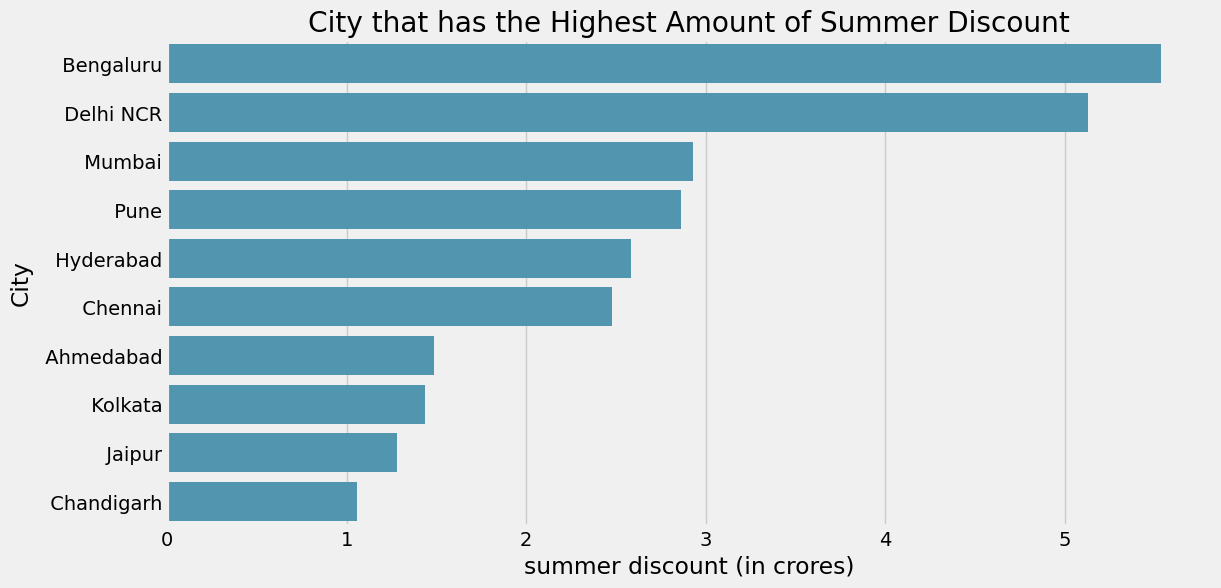

In [78]:
plt.figure(figsize=(12, 6))

price_lakh = (city_summer_discount.values)/10000000
sns.barplot(y=city_summer_discount.index, x=price_lakh, color='#429EBD')

plt.xlabel('summer discount (in crores)')
plt.ylabel('City')
plt.title('City that has the Highest Amount of Summer Discount')
plt.show()

### 💡 Insight

The city of Bengaluru emerged as the frontrunner in offering the highest amount of summer discounts on used cars, with an average discount of ₹55,379,000. 
Following Bengaluru, Delhi NCR ranked second in terms of the amount of summer discounts offered on used cars, with an average discount of ₹51,298,875. It is worth noting that Delhi NCR is a competitive market for used cars, and buyers can avail attractive price reductions during the summer period.

Mumbai secured the third position on the list, providing an average discount of ₹29,298,500 during the summer season. While the discounts in Mumbai are comparatively lower than those in Bengaluru and Delhi NCR, it still presents an opportunity for prospective used car buyers to save a significant amount.

Pune and Hyderabad secured the fourth and fifth positions, respectively, with average discounts of ₹28,608,700 and ₹25,858,550. And the cities such as Chennai, Ahmedabad, Kolkata, Jaipur, and Chandigarh also provide significant discounts during the summer season. Chennai offers an average discount of ₹24,756,450, while Ahmedabad and Kolkata provide discounts of ₹14,866,700 and ₹14,355,675, respectively. Jaipur and Chandigarh offer average discounts of ₹12,811,750 and ₹10,560,125, respectively.

### Which registered number series has the highest average value?

In [79]:
registration_series_price = df.groupby('registration')['price'].mean().sort_values(ascending=False)
registration_series_price = registration_series_price.head(10)
registration_series_price

registration
MH-44    2042000.0
HR-54    1422000.0
HR-42    1403000.0
TN-24    1381000.0
RJ-19    1375000.0
RJ-32    1314000.0
UP-11    1292000.0
KA-26    1242000.0
KA-63    1180000.0
TN-49    1141500.0
Name: price, dtype: float64

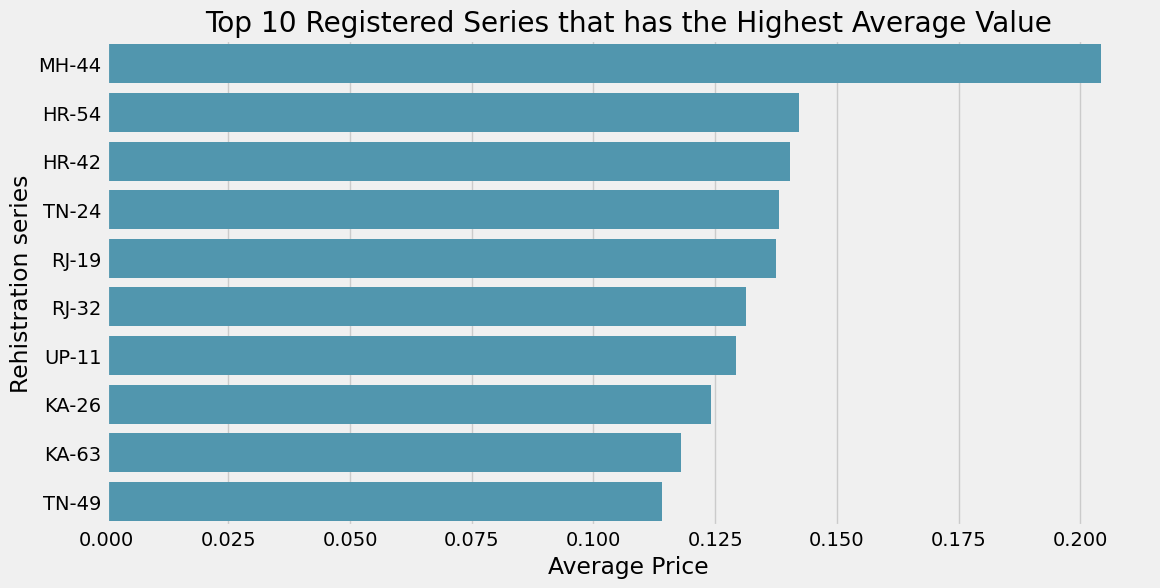

In [80]:
plt.figure(figsize=(12, 6))

price_lakh = (registration_series_price.values)/10000000
sns.barplot(data=df, y=registration_series_price.index, x=price_lakh, color='#429EBD')

plt.xlabel('Average Price')
plt.ylabel('Rehistration series')
plt.title('Top 10 Registered Series that has the Highest Average Value')
plt.show()

### 💡 Insight

Registration number series "MH-44" has the highest average value among all the registered number series. The average price for cars with the registration number "MH-44" was calculated to be INR 20,42,000 (in lakhs). This insight suggests that vehicles registered with the "MH-44" series tend to have a higher average value compared to cars with other registration number series in the dataset. 

- The second-highest average price is observed for cars registered under the series "HR-54," with an average value of 14.22 lakhs.
- Following closely, cars registered under "HR-42" and "TN-24" series have average prices of 14.03 lakhs and 13.81 lakhs, respectively.
- The registration series "RJ-19" and "RJ-32" have average values of 13.75 lakhs and 13.14 lakhs, respectively.
- Cars registered under the series "UP-11" and "KA-26" have average prices of 12.92 lakhs and 12.42 lakhs, respectively.
- Furthermore, the average price for cars registered under "KA-63" and "TN-49" series is 11.80 lakhs and 11.41 lakhs, respectively.